# Part 2 - Starbucks Capstone Challenge
# Customer Segementation using Unsupervised Machine Learning Model

In this notebooks contains 
- Feature Preprosessing
- Explaratory Data Analysis,
- Feature preparation and transformation
- K-Means clustering model
- Cluster Analyis
- Conclusion

## Problem Understanding

Understanding our customers is the key providing them a good service and sustain a profitable business. To understand them well, we need to pay attention on their purchase behaviour. One way we can collect and analyse their purchasing behaviour through an app, then identify their needs based on demographics.

The Starbucks Udacity Data Scientist Nanodegree Capstone challenge data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Periodically, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). However, some users might not receive any offer during certain weeks.

Using the data, in this section I aim to :
1. Gain understanding what types of customer characteristics and demographics are there.
2. What offer should be sent to each customer based on their demograhics ?

## Project Metrics :
An unsupervised machine learning model with K-Means is used to cluster the customers. 

The number of clusters is choosed with 2 metrics : 
1. The [Silhouttee score](https://en.wikipedia.org/wiki/Silhouette_(clustering))
```
The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation). The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
```

2. The Inertia / Sum Square Error (SSE) value, can be recognized as a measure of how internally coherent clusters are. We seek to minimize the value.

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - 
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record


# Part 2 - EDA, Feature Preparation, and Clustering

## 1. Import Library

In [2]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2
import helpers as h



## 2. Load Data

In [3]:
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)



## 3. Feature Extraction from data

In [4]:
transcript_clean, transcript_all = h.transcript_preprocessing(transcript, profile, portfolio)
profile_updated = h.feature_extraction(transcript_clean,transcript_all,profile, portfolio)

The transcript_clean.csv and transcript_merge.csv file are available at local folder
The profile_updated.csv file is available at local folder.


In [5]:
profile_updated.head()

,age,became_member_on,gender,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,...,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
68be06ca386d4c31939f3a4f0e3dd783,118,2017-02-12,NaN,NaN,0.0,0.0,0.0,0.0,1.0,1.0,...,0.5,0.5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.285714
0610b486422d4921ae7d2bf64640c50b,55,2017-07-15,F,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000
38fe809add3b4fcf9315a9694bb96ff5,118,2018-07-12,NaN,NaN,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000
78afa995795e4d85b5d9ceeca43f5fef,75,2017-05-09,F,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.333333
a03223e636434f42ac4c3df47e8bac43,118,2017-08-04,NaN,NaN,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000


## 5. Feature Preprocessing

### 5.1 Assess missing data in columns

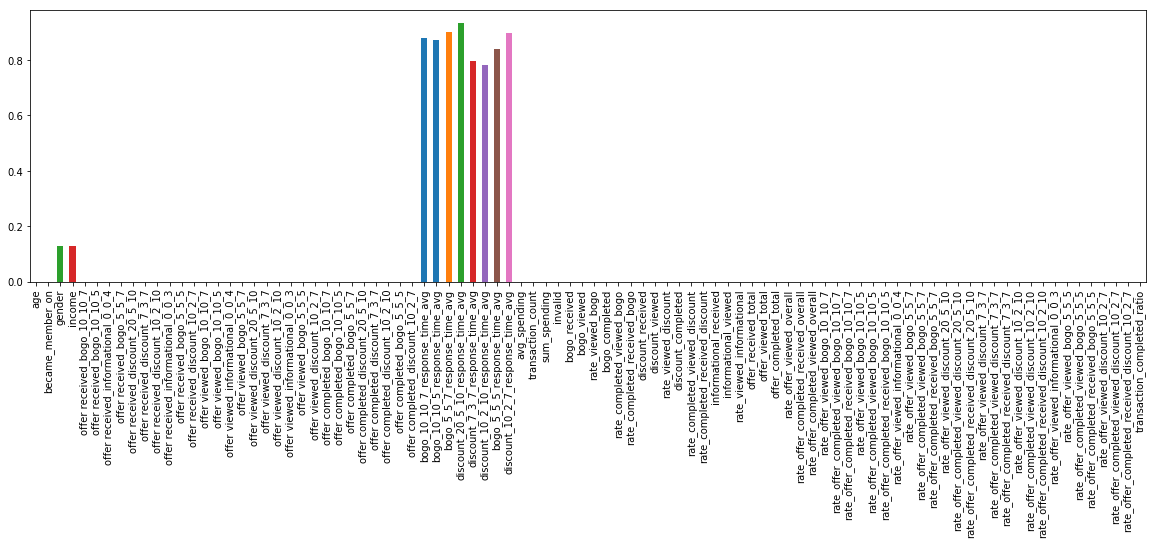

In [6]:
col_null = profile_updated.isnull().sum()
col_null_frac = col_null / profile_updated.shape[0]

plt.figure(figsize= (20,5))
col_null_frac.plot(kind='bar')


In [7]:
# cols to drop that have more than 50% missing values
cols_to_drop = col_null_frac[col_null_frac > 0.5].index.tolist()
cols_to_drop

['bogo_10_10_7_response_time_avg',
 'bogo_10_10_5_response_time_avg',
 'bogo_5_5_7_response_time_avg',
 'discount_20_5_10_response_time_avg',
 'discount_7_3_7_response_time_avg',
 'discount_10_2_10_response_time_avg',
 'bogo_5_5_5_response_time_avg',
 'discount_10_2_7_response_time_avg']

In [9]:
# drop columns in cols_to_drop
profile_updated_ = profile_updated.drop(cols_to_drop, axis=1)

# copy profile with response time 
profile_response_time = profile_updated.copy()

### 5.2 Assess missing data in rows

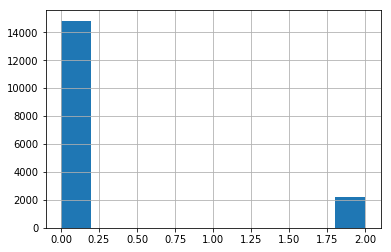

In [10]:
# How much data is missing in each row of the dataset?

row_null = profile_updated_.isnull().sum(axis=1)
row_null.hist()


In [11]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.


def dist_compare_cont(attribute, data):
    """
    input : 
        attribute: feature / attribute
        data : dataframe
    return : None, only plot the histogram
    """
    row_null = data.isnull().sum(axis=1)
    f, (ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(8,3))
    ax1 = data[row_null==0][attribute].hist(ax=ax1, bins=20)
    ax2 = data[row_null > 0][attribute].hist( ax=ax2, bins=20)
    ax1.set_title('No missing value')
    ax2.set_title('With missing value')
    f.suptitle('Feature: ' + attribute)
    f.tight_layout()
    f.subplots_adjust(top=0.8)

C:\Users\user\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


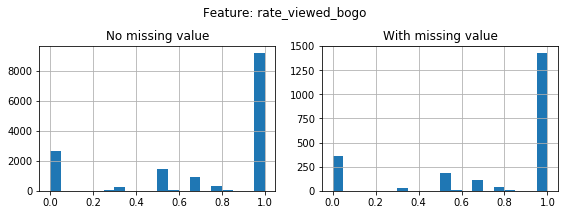

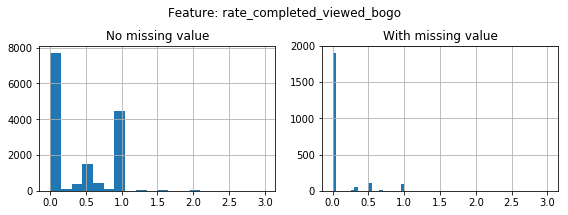

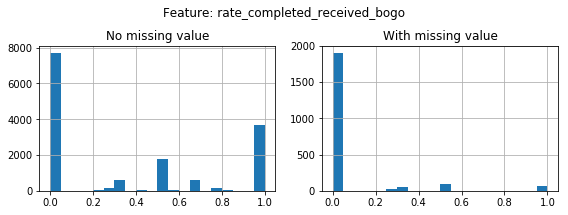

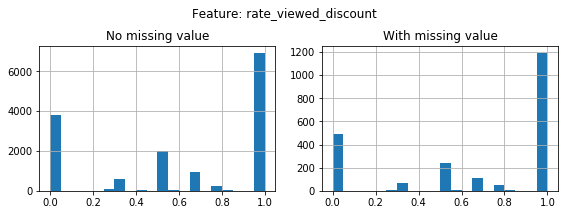

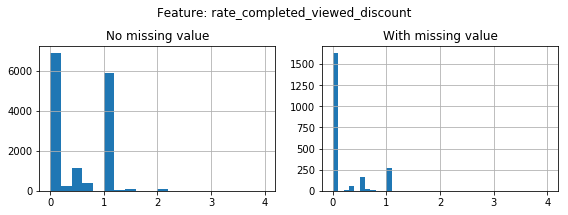

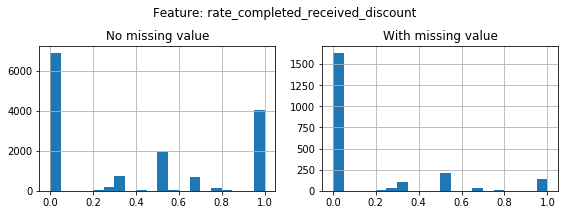

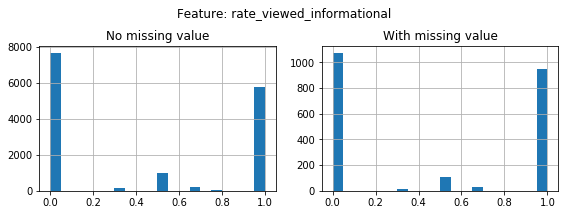

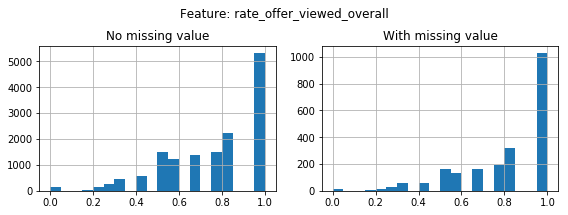

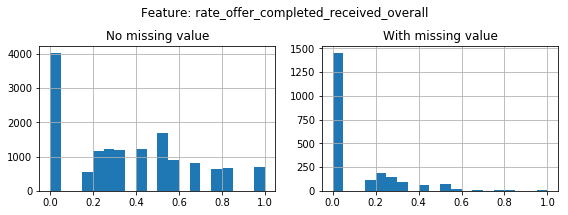

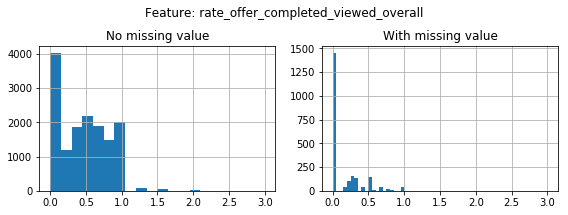

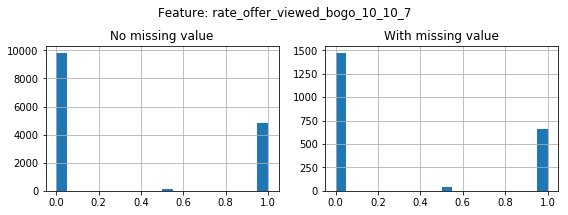

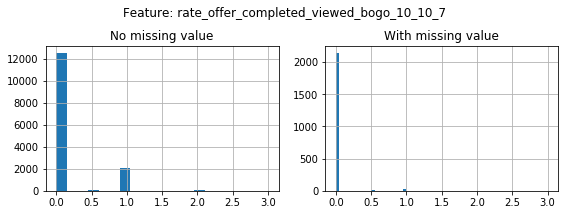

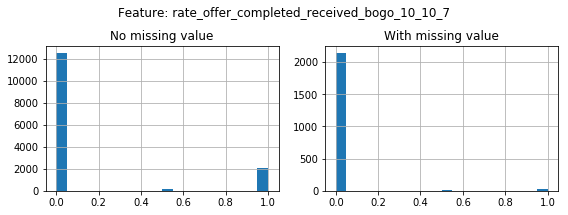

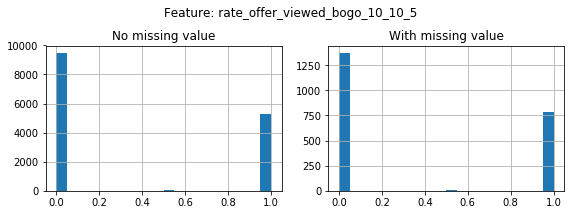

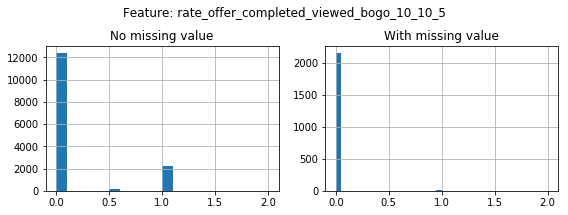

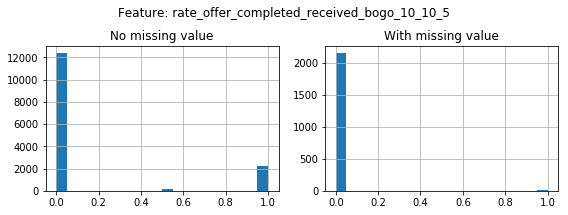

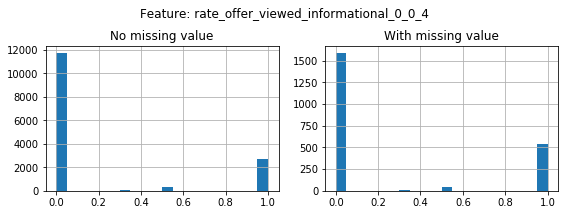

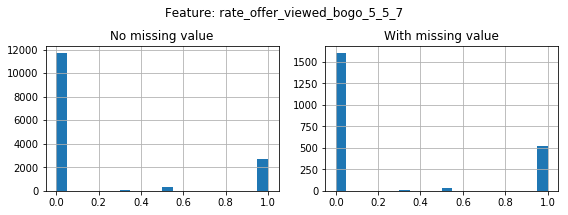

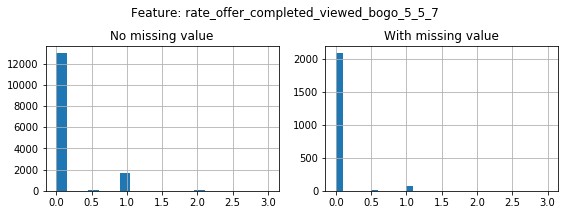

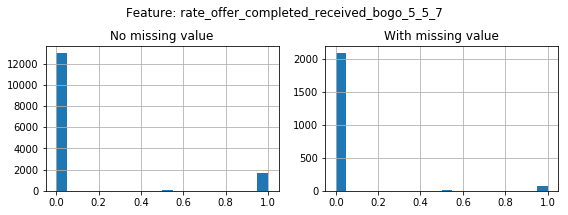

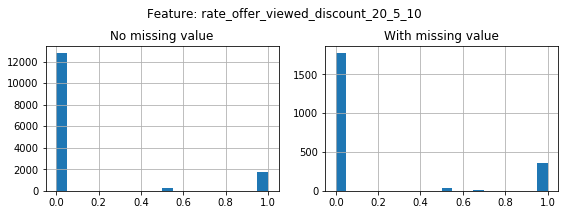

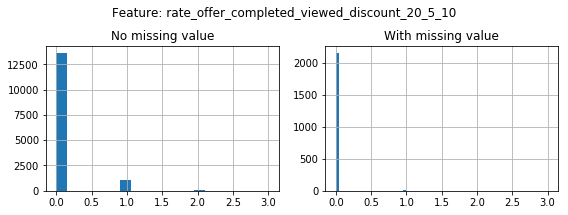

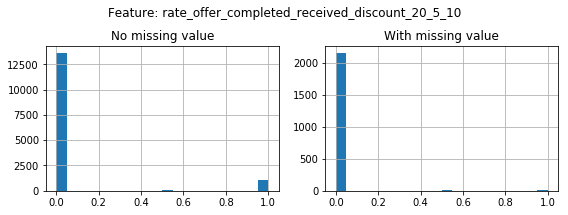

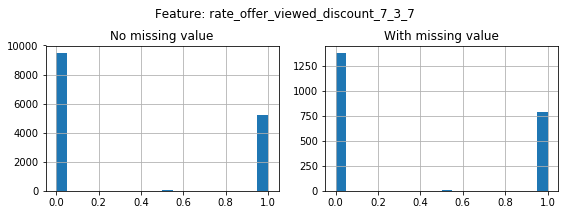

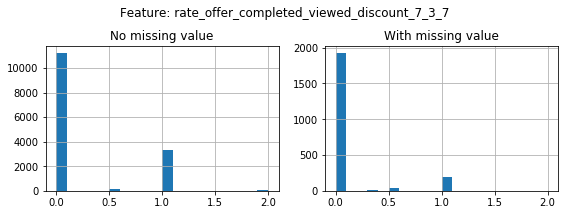

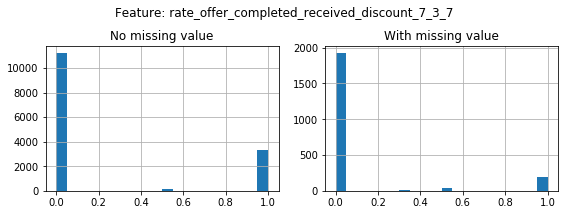

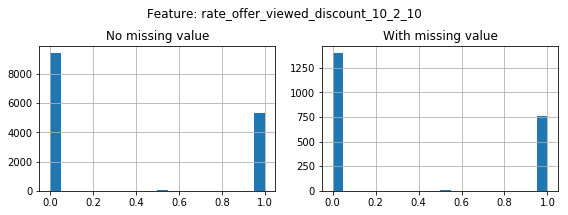

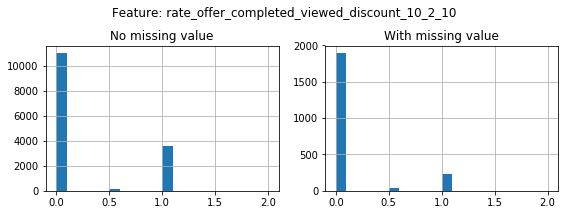

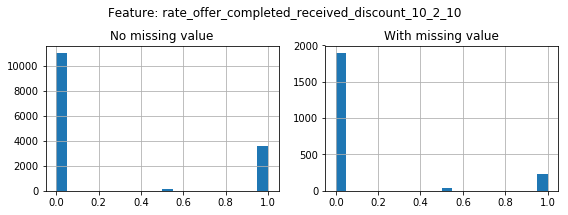

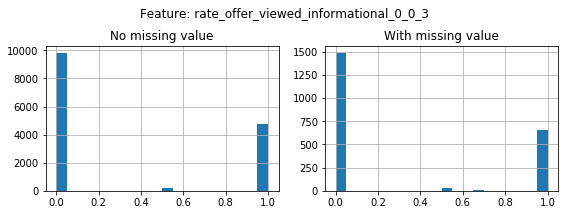

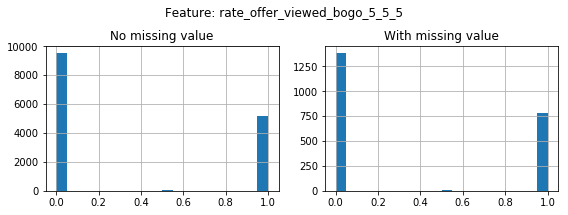

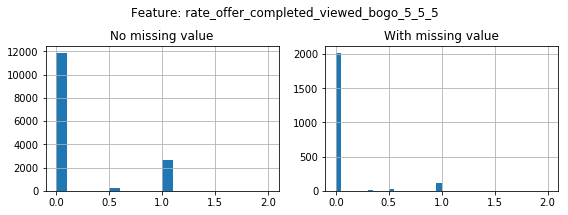

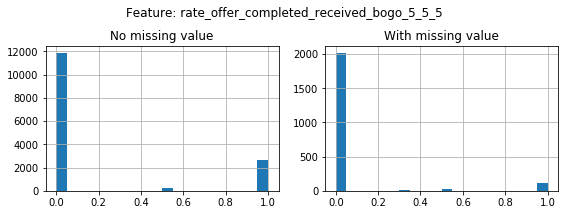

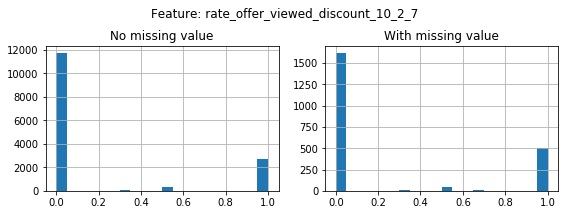

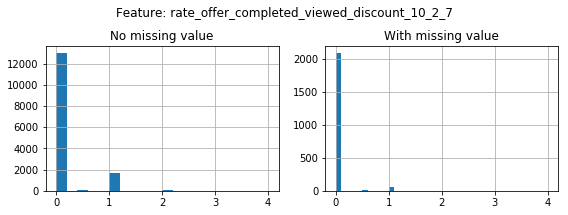

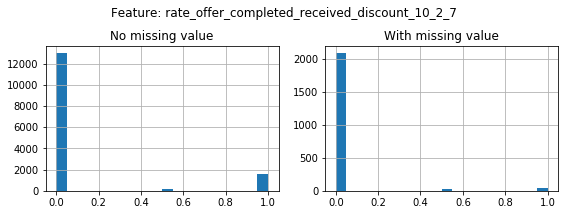

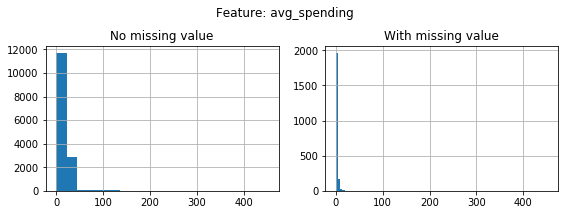

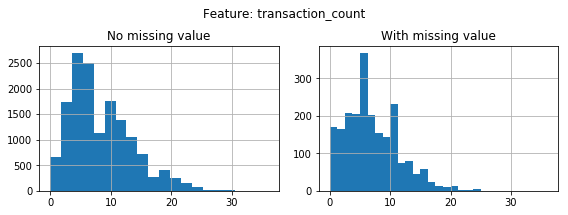

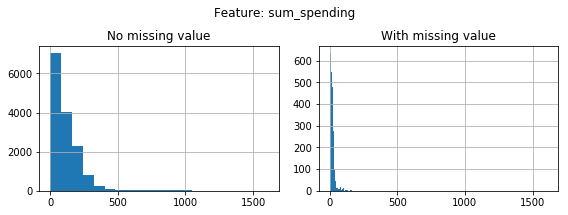

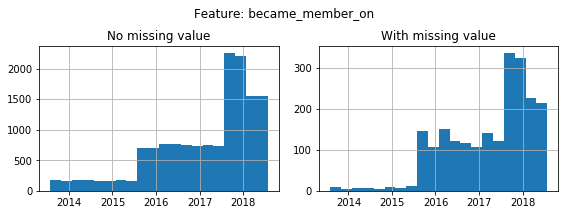

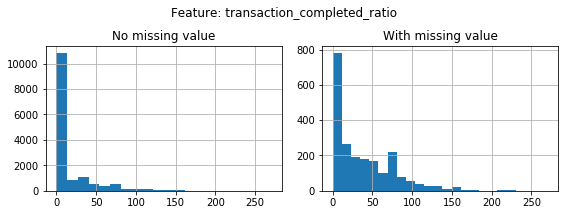

In [49]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

cols_to_compare = profile_updated.columns[profile_updated.columns.str.contains('rate')].tolist() + \
                    [ 'avg_spending', 'transaction_count', 'sum_spending', 'became_member_on', \
                     'transaction_completed_ratio']

for col in cols_to_compare:
    dist_compare_cont(col, profile_updated_)

The distribution between row data with no missing value and missing value are not similar for all feature, so we will keep both by separating the dataset while performing clustering

In [36]:
# sparate data with age < 100 and age >= 100, missing value on gender and income

#main profile
profile_updated_main = profile_updated_[profile_updated_.age < 100]

#special profile
profile_updated_sp = profile_updated_[profile_updated_.age >= 100]
profile_updated_sp = profile_updated_sp.drop(['gender', 'income', 'age'], axis=1)


### 5.3. Assess profile with valid and invalid offer completed transcript
```
Profile_valid = people who was influenced by offering (value=0)
Profile_invalid = people who was not influenced by offering (value > 0, which means how many transactions they made as invalid offer completed without viewed the offer)
```

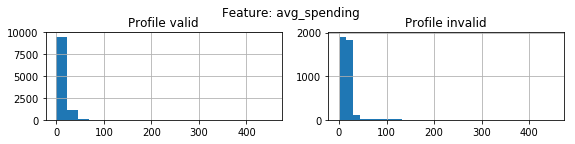

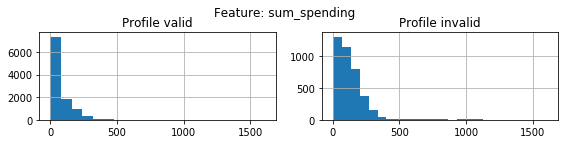

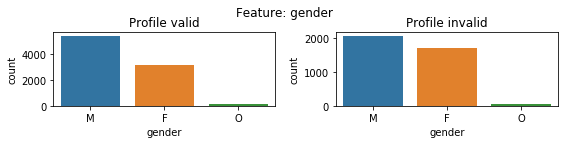

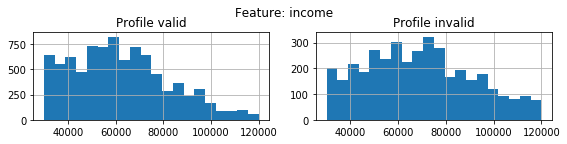

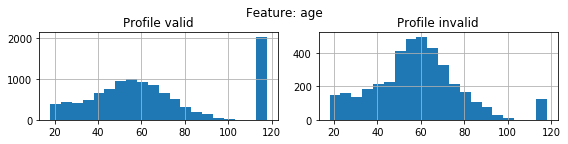

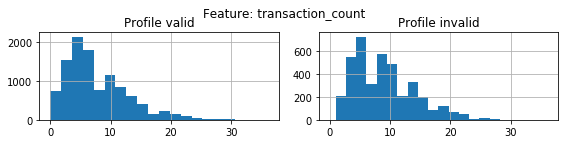

In [45]:
profile_invalid = profile_updated[profile_updated.invalid == 1 ]
profile_valid = profile_updated[profile_updated.invalid == 0]

cols_to_compare = [ 'avg_spending','sum_spending', 'gender','income', 'age', 'transaction_count']

for col in cols_to_compare:
    f, (ax1,ax2) = plt.subplots(1,2, figsize=(8,2), sharex=True)
    if col == 'gender':
        ax1 = sns.countplot(col, data=profile_valid, ax=ax1, order=['M','F', 'O'])
        ax2 = sns.countplot(col, data=profile_invalid, ax=ax2, order=['M','F', 'O'])
    else:
        ax1 = profile_valid[col].hist(ax=ax1, bins=20)
        ax2 = profile_invalid[col].hist( ax=ax2, bins=20)
    ax1.set_title('Profile valid')
    ax2.set_title('Profile invalid')
    f.suptitle('Feature: ' + col)
    f.tight_layout()
    f.subplots_adjust(top=0.8)

Profile invalid profiles :
    - Gender : Male & Female is balance, the proportion of female is larger than profile_valid
    - Spending : generally more spending than profile_valid
    - Income : generally higher income than profile_valid

`profile_valid` will be kept as feature for clustering

 ### 5.4 Re-Encode became_member_on features

In [50]:
import datetime

for df in [profile_updated_main, profile_updated_sp]:
    df.loc[:,'member_days_since'] = (datetime.datetime(2018,12,31) - df.became_member_on).dt.days 
    df.loc[:,'member_year'] = df.became_member_on.dt.year.astype(str)

profile_updated_main = profile_updated_main.drop('became_member_on', axis=1)
profile_updated_sp = profile_updated_sp.drop('became_member_on', axis=1)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [52]:
profile_updated_main.head()

,age,gender,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,...,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio,member_days_since,member_year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0610b486422d4921ae7d2bf64640c50b,55,F,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,534,2017
78afa995795e4d85b5d9ceeca43f5fef,75,F,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.333333,601,2017
e2127556f4f64592b11af22de27a7932,68,M,70000.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.428571,249,2018
389bc3fa690240e798340f5a15918d5c,65,M,53000.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.588235,325,2018
2eeac8d8feae4a8cad5a6af0499a211d,58,M,51000.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.636364,415,2017


In [53]:
profile_updated_sp.head()

,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,offer received_bogo_5_5_5,offer received_discount_10_2_7,...,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio,member_days_since,member_year
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
68be06ca386d4c31939f3a4f0e3dd783,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.285714,687,2017
38fe809add3b4fcf9315a9694bb96ff5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,60.000000,172,2018
a03223e636434f42ac4c3df47e8bac43,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.000000,514,2017
8ec6ce2a7e7949b1bf142def7d0e0586,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.000000,462,2017
68617ca6246f4fbc85e91a2a49552598,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,20.000000,455,2017


 ### 5.5 Re-Encode Categorical Features

In [51]:
# one hot gender columns

profile_onehot_main = pd.get_dummies(profile_updated_main)

profile_onehot_sp = pd.get_dummies(profile_updated_sp)


### 5.6 Create a feature preprocessing function

In [5]:
import datetime

def separate_profile(profile_updated_df):
    """
    INPUT :
        profile_updated_df : dataframe of profile
        
    RETURN :
        profile_updated_main : updated profile df for main profile, age < 100
        profile_updated_sp : updated profile df for special profile, age >= 100
    """
    # sparate data with age < 100 and age >= 100, missing value on gender and income

    #main profile
    profile_updated_main = profile_updated_df[profile_updated_df.age < 100]

    #special profile
    profile_updated_sp = profile_updated_df[profile_updated_df.age >= 100]
    profile_updated_sp = profile_updated_sp.drop(['gender', 'income', 'age'], axis=1)
    
    return profile_updated_main, profile_updated_sp


def encode_member_day(profile_updated_df):
    """
    INPUT :
        profile_updated_df : profile df
    
    RETURN :
        profile_updated_df : updated profile df, with additional col of 'member_year'
    
    It calculate delta days 31 dec 2018 and became_member_on date
    """
    profile_updated_df = profile_updated_df.copy()
    profile_updated_df['member_days_since'] = (datetime.datetime(2018,12,31) - profile_updated_df.became_member_on).dt.days 
    profile_updated_df['member_year'] = profile_updated_df.became_member_on.dt.year.astype(str)
    profile_updated_df = profile_updated_df.drop('became_member_on', axis=1)
    return profile_updated_df

def feature_preprocessing(profile_updated_df, transcript_all_df, portfolio_df):
    """
    INPUT :
        profile_updated_df : updated profile df
        transcript_all_df : transcript df that contains both invalid and valid profile as output of transcrip_preprocessing function
        portfolio_df : portfolio df
        
    RETURN :
        profile_onehot_main : main profile df with one_hot enconded
        profile_onehot_sp : sp profile df with one_hot enconded
    
    """    
    #drop features that have more than 50% missing values
    col_null = profile_updated_df.isnull().sum()
    col_null_frac = col_null / profile_updated_df.shape[0]
    cols_to_drop = col_null_frac[col_null_frac > 0.5].index.tolist()
    profile_updated_df = profile_updated_df.drop(cols_to_drop, axis=1)
    
    # remove row data that have age > 100 years, missing values on income and gender
    profile_updated_main, profile_updated_sp = separate_profile(profile_updated_df)
    
    # re-encode became_member_on to member_day (how may days since become member from 31 dec 2018)
    profile_updated_clean = encode_member_day(profile_updated_main)
    profile_updated_sp = encode_member_day(profile_updated_sp)
    
    # one-hot the categorical features
    profile_onehot_main = pd.get_dummies(profile_updated_clean)
    profile_onehot_sp = pd.get_dummies(profile_updated_sp)

    return profile_onehot_main, profile_onehot_sp

In [6]:
profile_dummy = h.feature_extraction(transcript_clean,transcript_all,profile, portfolio)

The profile_updated.csv file is available at local folder.


In [7]:
profile_main, profile_sp = feature_preprocessing(profile_dummy, transcript_all, portfolio)

## 6. EDA

### Selected Feature Correlation

Text(0.5, 1.0, 'Profile Main - Features Correlation')

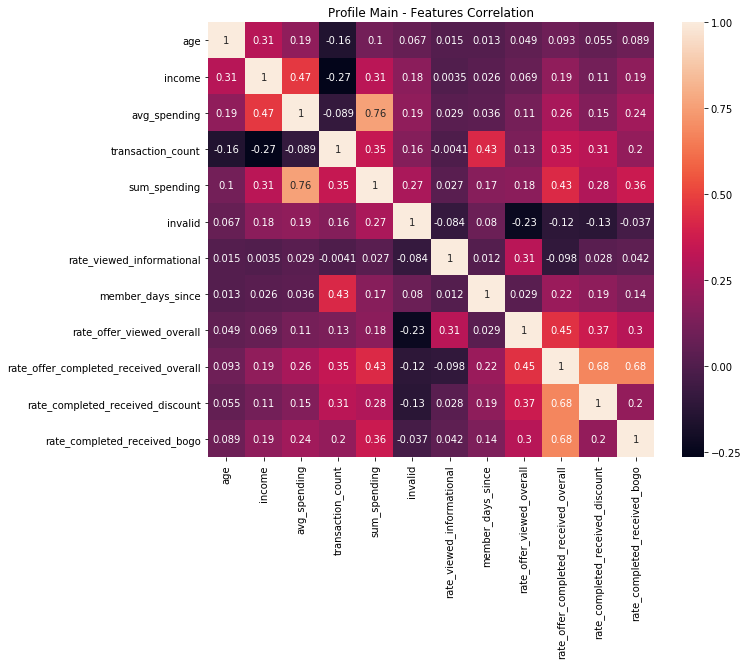

In [10]:
cols = ['age', 'income',  'avg_spending', 'transaction_count', 'sum_spending', 'invalid','rate_viewed_informational',
        'member_days_since',  'rate_offer_viewed_overall','rate_offer_completed_received_overall',
       'rate_completed_received_discount', 'rate_completed_received_bogo']

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(profile_main[cols].corr(), ax=ax, annot=True)
ax.set_title("Profile Main - Features Correlation")

#### For main profile:
- Income is postively correlated with `age`, `avg_spending`, and `sum_spending`
- profile `invalid` (who make transaction when there was no offered) is positively correlated with `income`, `avg_spendin`, `sum_spending`, but is negatively correlated with `rate_offer_viewed_overall`. This is the group who will keep purchase when they did not receive any offer, they unlikely to viewed the offer sent.
- `rate_offer_completed_received_overall` is positively correlated with `income`, `avg_spending`, `transaction_count`, `sum_spending`, and `rate_offer_viewed_overall`. Someone who has higher income tend to spend more and likely to complete the offer received.

Text(0.5, 1.0, 'Profile Special - Features Correlation')

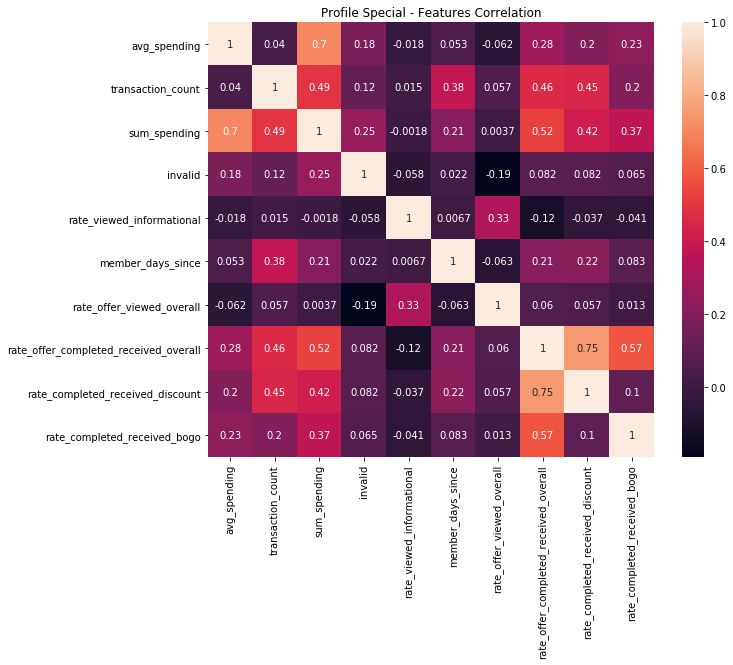

In [11]:
cols_sp = ['avg_spending', 'transaction_count', 'sum_spending', 'invalid','rate_viewed_informational',
        'member_days_since',  'rate_offer_viewed_overall','rate_offer_completed_received_overall',
       'rate_completed_received_discount', 'rate_completed_received_bogo']

f,ax = plt.subplots(figsize=(10,8))
sns.heatmap(profile_sp[cols_sp].corr(), ax=ax, annot=True)
ax.set_title("Profile Special - Features Correlation")

#### For Special Profile :
- profile `invalid` is similar to the main profile which is positively correlated with `income`, `avg_spendin`, `sum_spending`, but is negatively correlated with `rate_offer_viewed_overall`. 
- `avg_spending` is positively correlated with `sum_spending`, profile `invalid`, and likely to have higher rate offer completed.
- similar to main profile, `rate_offer_completed_received_overall` is positively correlated with `avg_spending`, `transaction_count`, `sum_spending`, except there is a weaker correlation with `rate_offer_viewed_overall`.

### Feature Distribution

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


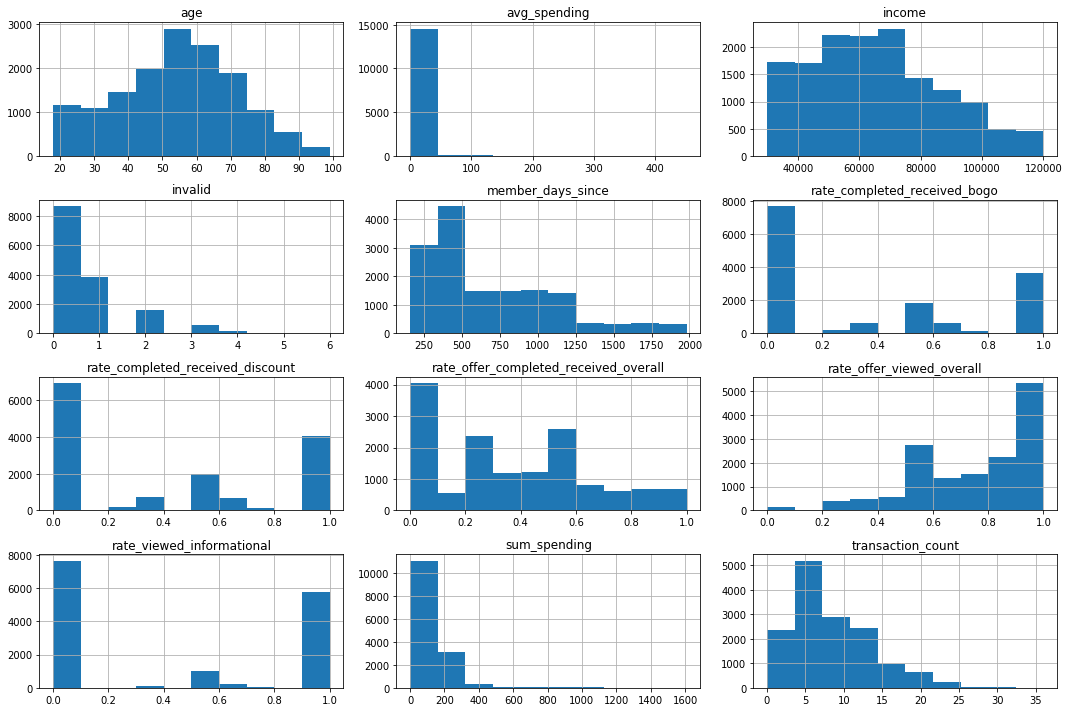

In [20]:
# Let's see their distribution for MAIN PROFILE
f, ax = plt.subplots(figsize=(15,10))
profile_main[cols].hist(ax=ax);
plt.tight_layout()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


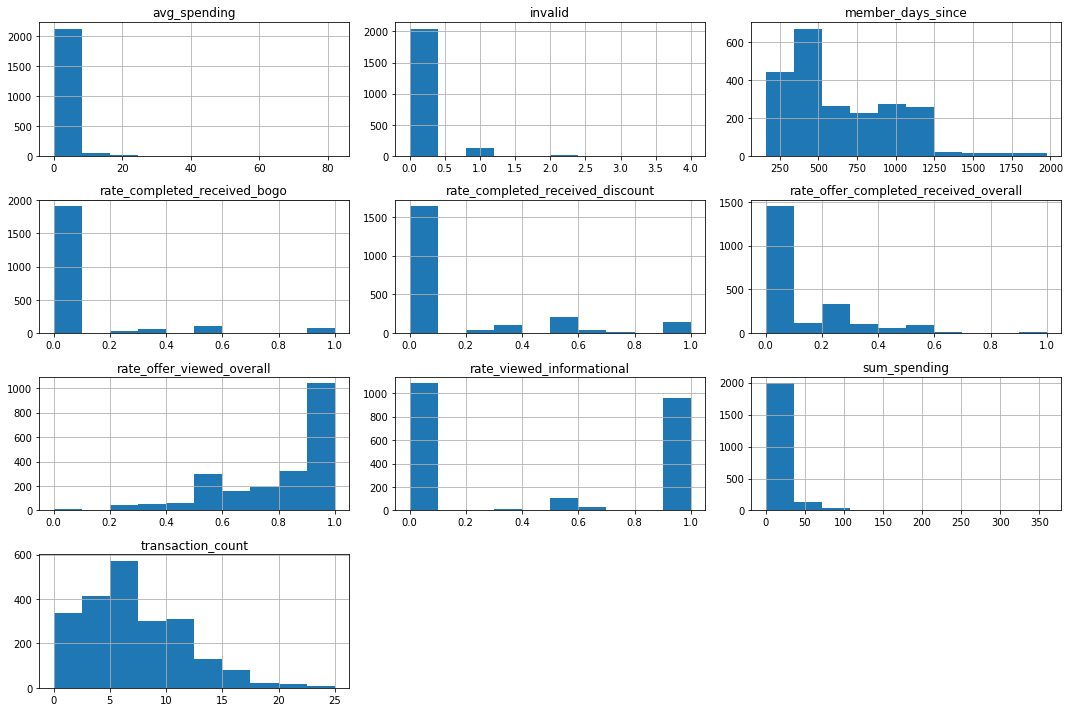

In [25]:
# Let's see their distribution for SPECIAL PROFILE
f, ax = plt.subplots(figsize=(15,10))
profile_sp[cols_sp].hist(ax=ax);
plt.tight_layout()

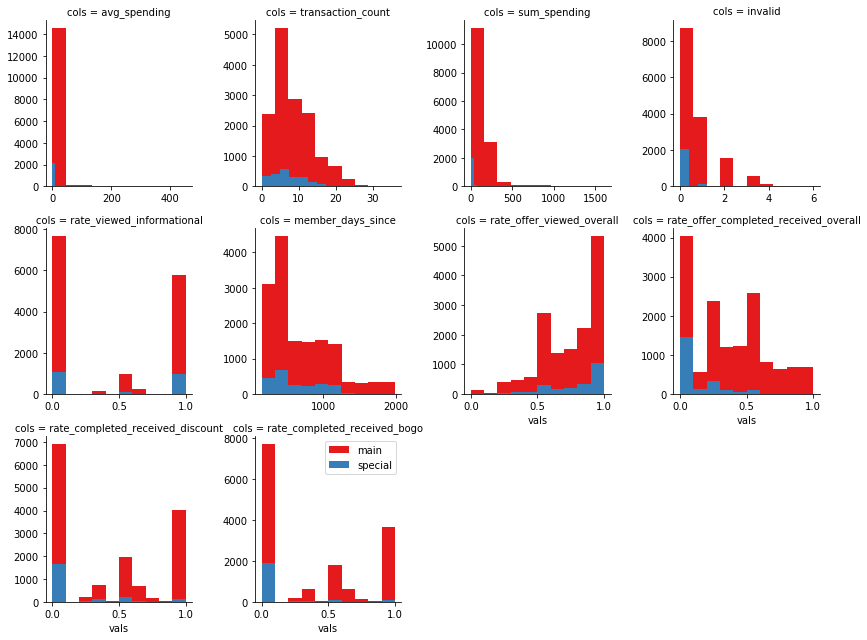

In [39]:
#compare the distribution main vs special profile

main = profile_main.copy()
special = profile_sp.copy()
main['profile'] = 'main'
special['profile'] = 'special'
merge_df = pd.concat([main, special], axis=0, sort=True)
merge_melt = merge_df[cols_sp + ['profile']].melt(['profile'], var_name='cols',  value_name='vals')

#plot
g = sns.FacetGrid(merge_melt, col='cols', hue="profile", palette="Set1", col_wrap=, sharey=False, sharex=False)
g = (g.map(plt.hist, "vals"))
g.axes[-1].legend()
plt.show()

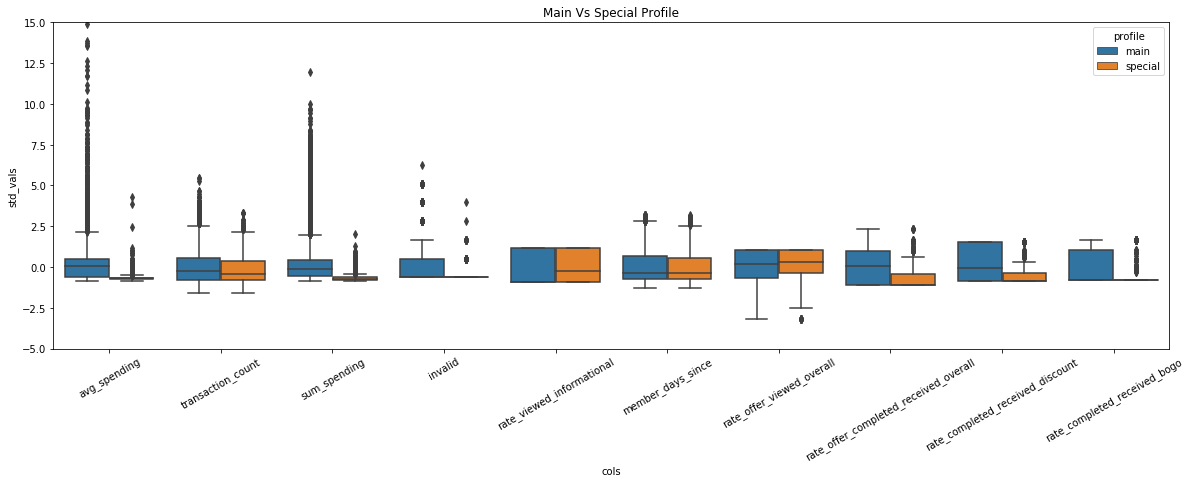

In [34]:
#compare the boxplot main vs special profile
main = profile_main.copy()
special = profile_sp.copy()
main['profile'] = 'main'
special['profile'] = 'special'
merge_df = pd.concat([main, special], axis=0, sort=True)
merge_df_std = (merge_df[cols_sp] - merge_df[cols_sp].mean()) / merge_df[cols_sp].std()
merge_df_std['profile'] = merge_df['profile']
merge_melt = merge_df_std[cols_sp + ['profile']].melt(['profile'], var_name='cols',  value_name='std_vals')


f, ax = plt.subplots(figsize=(20,6))
sns.boxplot('cols','std_vals', hue='profile', data=merge_melt, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);
ax.set_ylim(-5,15);
ax.set_title('Main Vs Special Profile');

Customer in both main and special profile viewed the offer at the similar rate. However, Customer in Special Profile tend to have lower `avg_spending`, `sum_spending`,  rate offer completed.

### What are Regular customers demographics look like ?
#### Valid Vs Invalid Profile

- Profile_valid = people who was influenced by offering (value=0), means they received, viewed, and completed the offer
- Profile_invalid = people who was not influenced by offering (value > 0, which means how many transactions they made as invalid offer completed without viewed the offer)

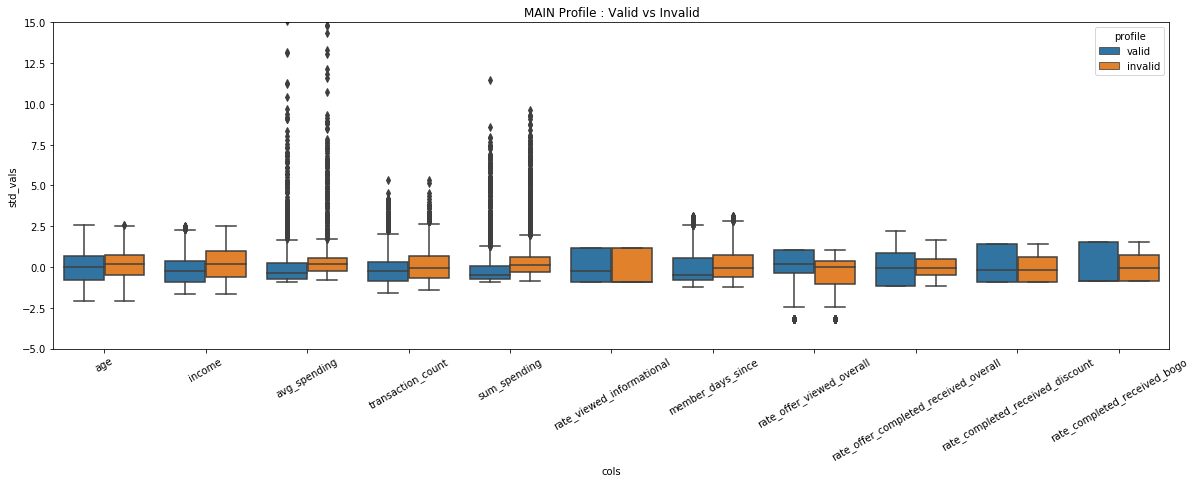

In [35]:
#compare the boxplot profile valid vs invalid for MAIN PROFILE
main = profile_main.copy()
main.loc[main.invalid > 0,'profile'] = 'invalid'
main.loc[main.invalid == 0,'profile'] = 'valid'
main_std = (main[cols] - main[cols].mean()) / main[cols].std()
main_std = main_std.drop('invalid', axis=1)
main_std['profile'] = main['profile']

main_melt = main_std.melt(['profile'], var_name='cols',  value_name='std_vals')


f, ax = plt.subplots(figsize=(20,6))
sns.boxplot('cols','std_vals', hue='profile', data=main_melt, ax=ax, hue_order=['valid', 'invalid'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);
ax.set_ylim(-5,15);
ax.set_title("MAIN Profile : Valid vs Invalid");

For main profile, the invalid profile tend to be older, earlier member, have higher income and spend more, and they have lower offer viewed rate.

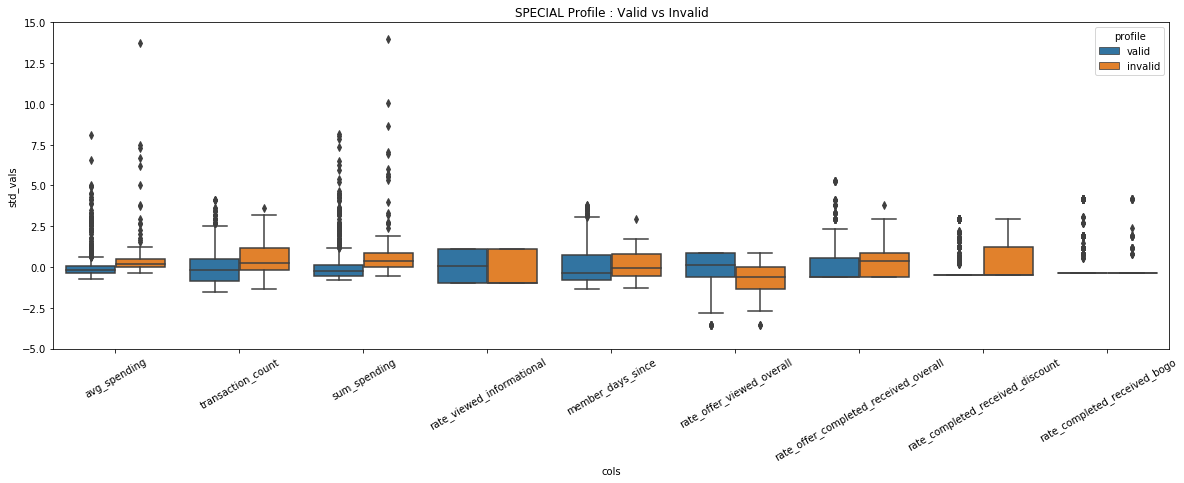

In [32]:
#compare the boxplot profile valid vs invalid for SPECIAL PROFILE
main = profile_sp.copy()
main.loc[main.invalid > 0,'profile'] = 'invalid'
main.loc[main.invalid == 0,'profile'] = 'valid'
main_std = (main[cols_sp] - main[cols_sp].mean()) / main[cols_sp].std()
main_std = main_std.drop('invalid', axis=1)
main_std['profile'] = main['profile']

main_melt = main_std.melt(['profile'], var_name='cols',  value_name='std_vals')


f, ax = plt.subplots(figsize=(20,6))
sns.boxplot('cols','std_vals', hue='profile', data=main_melt, ax=ax, hue_order=['valid', 'invalid'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=30);
ax.set_ylim(-5,15);
ax.set_title("SPECIAL Profile : Valid vs Invalid");

Customer in both main and special profile, have the similar behaviour for invalid profile, they are who tend to have higher `avg_spending`, `transaction_count`, `sum_spending`, earlier member, and lower offer viewed rate

## 7. Feature Transformation

### 7.1 Feature Scaling

In [172]:
from sklearn.preprocessing import StandardScaler

def perform_scaling(df):
    scaler = StandardScaler()
    std_arr = scaler.fit_transform(df)
    df_std = pd.DataFrame(std_arr, index=df.index, columns= df.columns)
    return df_std, scaler

profile_std_main, scaler_main = perform_scaling(profile_main)
profile_std_sp, scaler_sp = perform_scaling(profile_sp)

In [173]:
h.save(scaler_main, 'sav/scaler_main.sav')
h.save(scaler_sp, 'sav/scaler_sp.sav')

### 7.2. Perform Dimensionality Reduction

In [139]:
from sklearn.decomposition import PCA

pca_main = PCA()
pca_main.fit(profile_std_main)

pca_sp = PCA()
pca_sp.fit(profile_std_sp)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [140]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components = len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(20, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
#     for i in range(num_components):
#         ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


Number of Main PCA components that explained at least 95% variance : 34


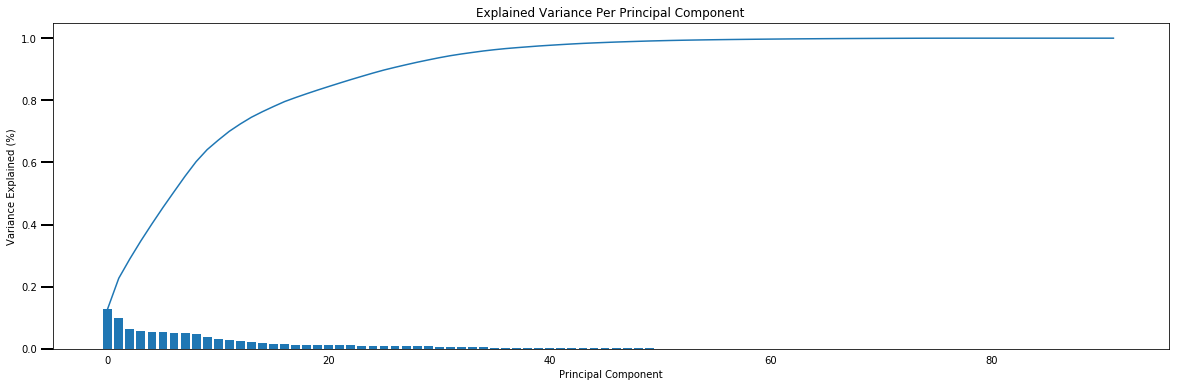

In [141]:
#scree plot for main profile
scree_plot(pca_main)

#PCA
# number of PCA components that explained at least 95% variance ==> 34 components
cumvals = np.cumsum(pca_main.explained_variance_ratio_)
print("Number of Main PCA components that explained at least 95% variance : {}".format(np.where(cumvals >= 0.95)[0][0]+1))

Number of Special PCA components that explained at least 95% variance : 29


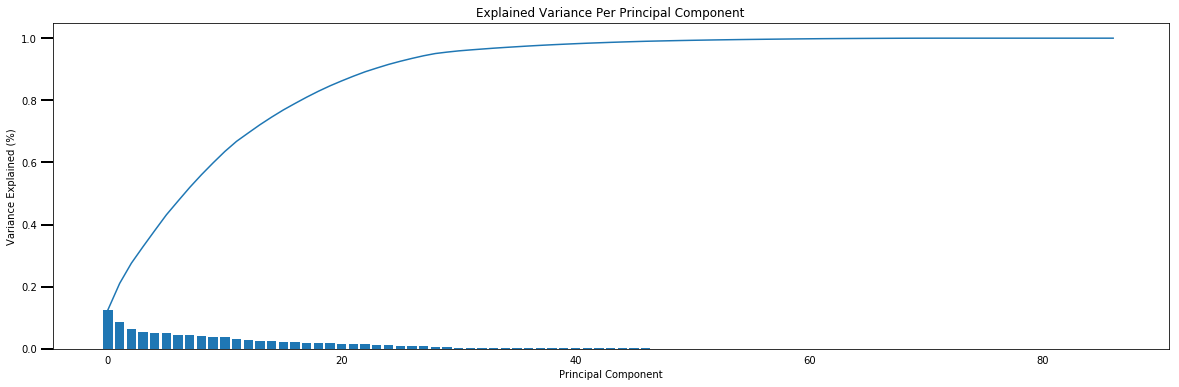

In [142]:
#scree plot for special profile
scree_plot(pca_sp)

#PCA
# number of PCA components that explained at least 95% variance ==> 29 components
cumvals = np.cumsum(pca_sp.explained_variance_ratio_)
print("Number of Special PCA components that explained at least 95% variance : {}".format(np.where(cumvals >= 0.95)[0][0]+1))

In [143]:
#PCA transform with 95% explained variance


def pca_fit_transform(df, var = None):
    pca = PCA(var)
    transform_arr = pca.fit_transform(df)
    return pca, transform_arr

pca_main, pca_transform_main = pca_fit_transform(profile_std_main, var=0.95)
pca_sp, pca_transform_sp = pca_fit_transform(profile_std_sp, var=0.95)

In [171]:
h.save(pca_main, 'sav/pca_main.sav')
h.save(pca_sp, 'sav/pca_sp.sav')



### 7.3 Interpret Principal Components

In [146]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.


def plot_weight(df, pca, ith) :
    '''
    plot weight for the i-th principal component to corresponding feature names
    Input : 
        df = original dataframe
        pca = pca.fit(data)
        ith = int value, from 1 to len(pca.n_components)
    Return : axes of barplot 
    '''
    sort_pca = sorted([(weight, label) for weight,label in zip(pca.components_[ith-1], df.columns) ])
    weights, features = zip(*sort_pca)
    weights, features = list(weights), list(features)
    fig, ax = plt.subplots(figsize=(10,20))
    ax = sns.barplot(weights, features)
    return ax

#### 7.3.1. Main Profile

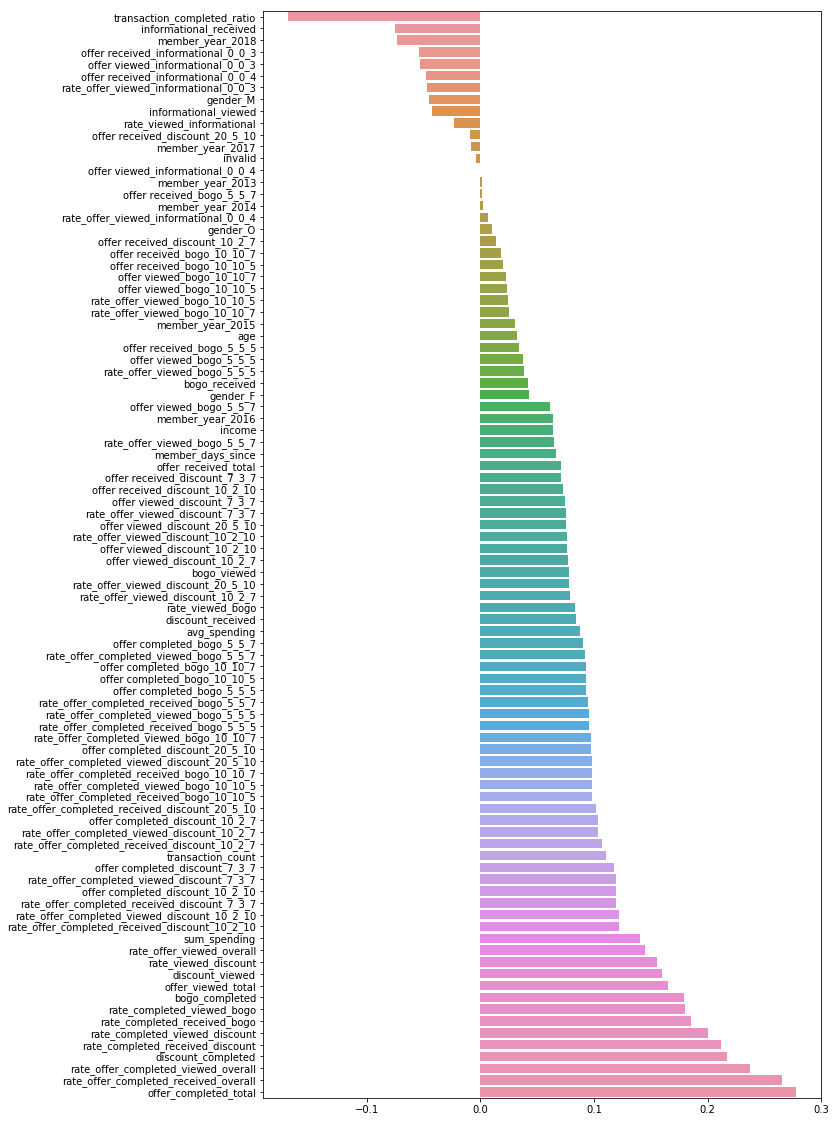

In [147]:
# 1st PCA comp
plot_weight(profile_std_main,pca_main, 1 )

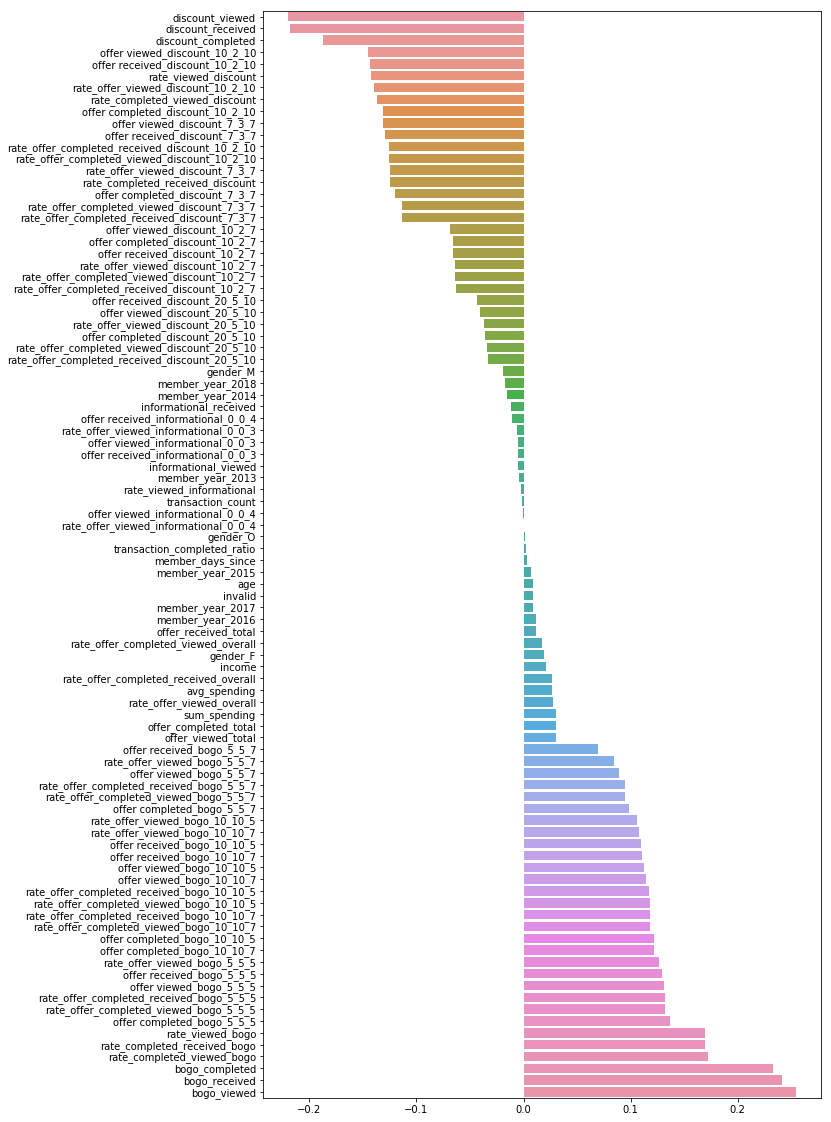

In [148]:
# 2nd PCA comp
plot_weight(profile_std_main,pca_main, 2 )

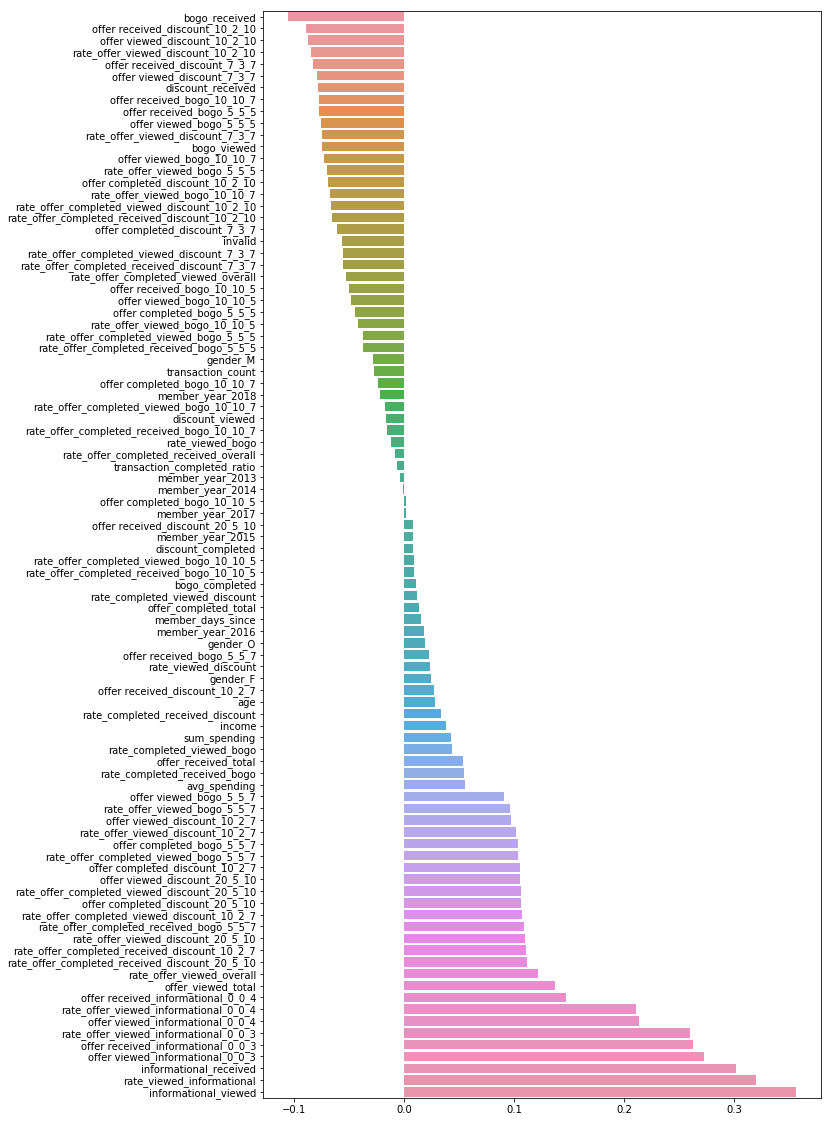

In [149]:
# 3rd PCA comp
plot_weight(profile_std_main,pca_main, 3 )

#### 7.3.2. Special Profile

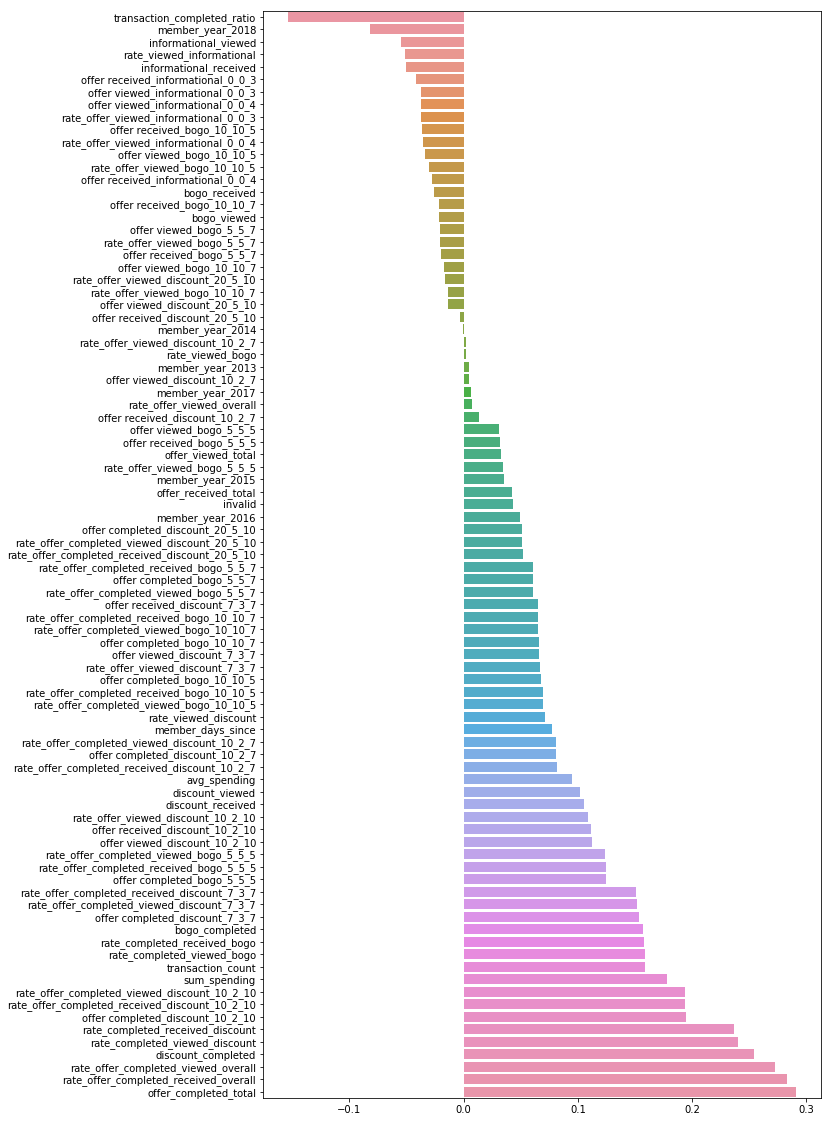

In [150]:
plot_weight(profile_std_sp,pca_sp, 1 )

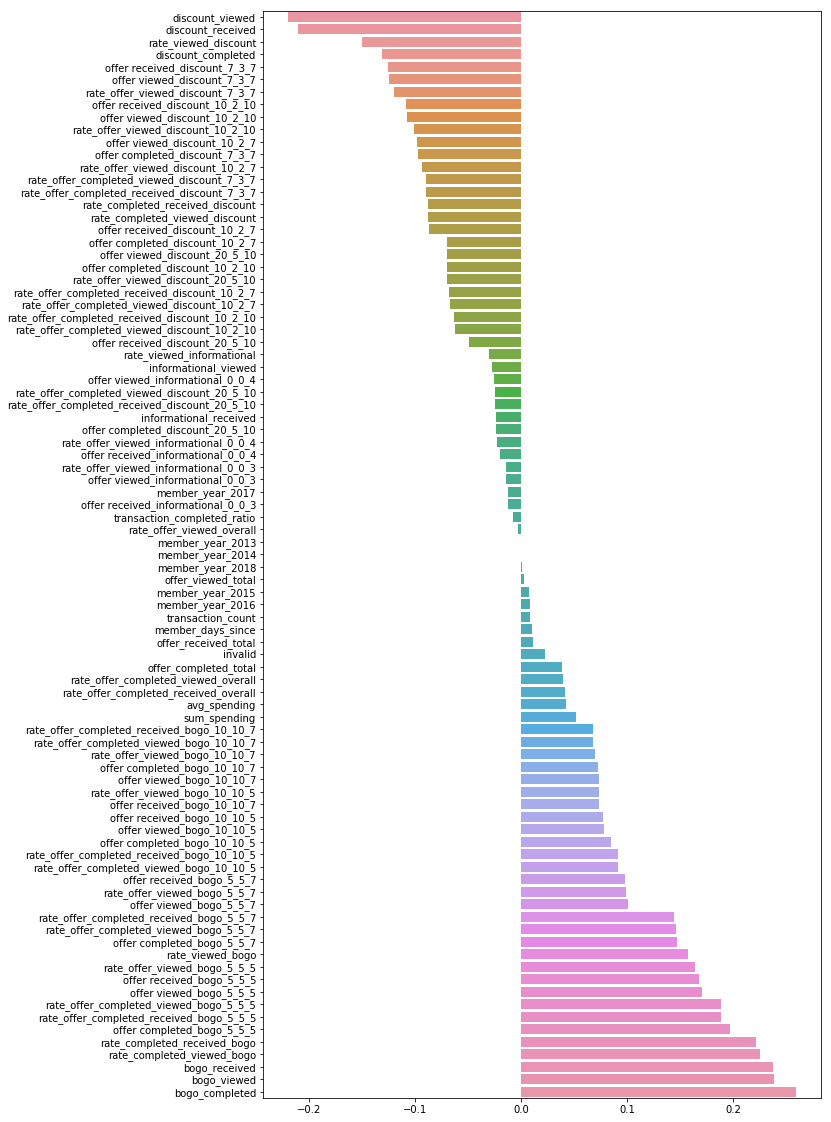

In [151]:
plot_weight(profile_std_sp,pca_sp, 2)

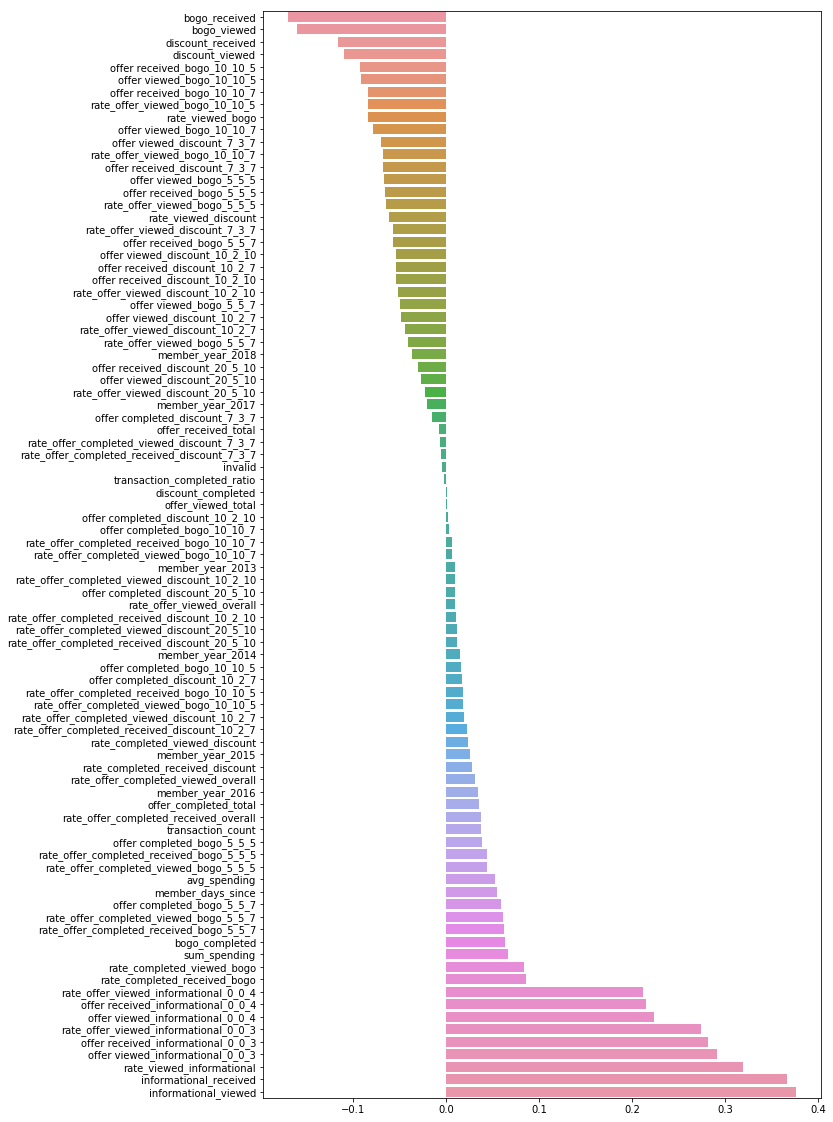

In [152]:
plot_weight(profile_std_sp,pca_sp, 3 )

# Part 3 - Machine Learning Model - Unsupervised

## 8. Clustering

### 8.1 Finding number of clusters

In [8]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import  silhouette_score
from tqdm import tqdm

def finding_num_cluster(X, min_clusters =2, max_clusters =30):
    silh = []
    inertia = []
    clusters = range(min_clusters,max_clusters)
    for n in tqdm(clusters):

        model = KMeans(n_clusters = n, random_state=42)
        preds = model.fit_predict(X)

        silhouette_avg = silhouette_score(X, preds)

        silh.append(silhouette_avg)
        inertia.append(model.inertia_)

    fig, (ax1,ax2) = plt.subplots(2,1, sharex=False, figsize=(8,7))
    ax1.plot(clusters, silh,marker="o")
    ax1.set_ylabel("Silhoutte Score")
    ax1.set_xlabel('number of clusters')
    ax2.plot(clusters, inertia, marker="o")
    ax2.set_ylabel("Inertia (SSE)")
    ax2.set_xlabel("number of clusters")
    plt.show()

100%|██████████| 28/28 [04:06<00:00, 10.04s/it]


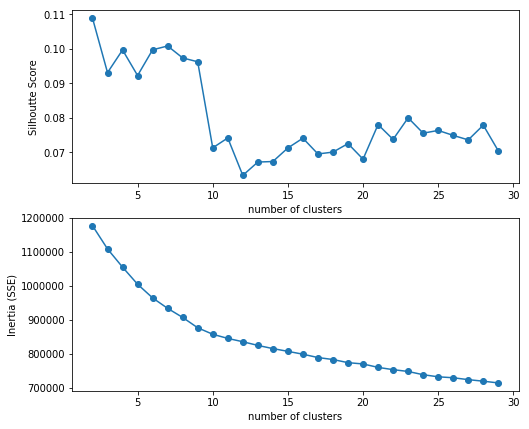

In [9]:
finding_num_cluster(pca_transform_main)

In [12]:
from sklearn.metrics import  silhouette_score
preds = kmeans_main.predict(pca_transform_main)
silhouette_avg = silhouette_score(pca_transform_main, preds)
sse = kmeans_main.inertia_

print(f"The silhouette index is {silhouette_avg}")
print(f"The SSE / inertia value is {sse}")

The silhouette index is 0.09622754491722799
The SSE / inertia value is 875763.1709894588


**For main data**, The SSE value may not indicate a clear "Elbow" to choose, however the sillhoutte score at cluster 9 is probably the optimum cluster as the score is still relatively higher and before sudden decreased at cluster 10. So, the selected number of cluster is 9 clusters.

100%|██████████| 28/28 [00:12<00:00,  1.63it/s]


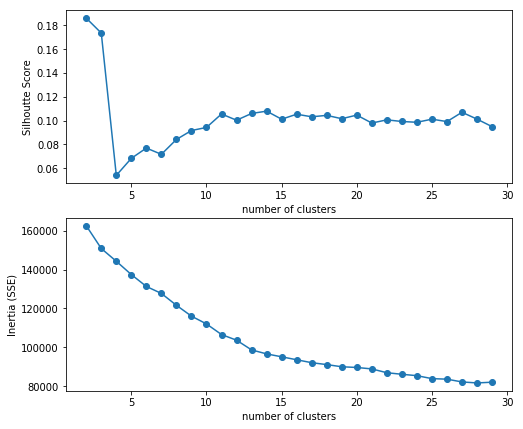

In [10]:
finding_num_cluster(pca_transform_sp)

**For special data**, similar to the main data, The SSE valie did not provide a clear guidance. The selected number of cluster is 11 where the silhoutte score is still higher and the SSE value is relatively lower

### 8.2 Perform K-means clustering

In [166]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.

kmeans_main = KMeans(n_clusters = 9, random_state=42)
preds_main = kmeans_main.fit_predict(pca_transform_main) 
h.save(kmeans_main, 'sav/kmeans_main.sav')

#azdias special data
kmeans_sp = KMeans(n_clusters = 11, random_state=42)
preds_sp = kmeans_sp.fit_predict(pca_transform_sp) 
h.save(kmeans_sp, 'sav/kmeans_sp.sav')

In [8]:
#load
import warnings
warnings.filterwarnings('ignore')

#scaler
scaler_main = h.load('sav/scaler_main.sav')
scaler_sp = h.load('sav/scaler_sp.sav')
profile_std_main = scaler_main.transform(profile_main)
profile_std_sp = scaler_sp.transform(profile_sp)

#pca

pca_main = h.load('sav/pca_main.sav')
pca_sp = h.load('sav/pca_sp.sav')
pca_transform_main = pca_main.transform(profile_std_main)
pca_transform_sp = pca_sp.transform(profile_std_sp)

#kmeans
kmeans_main = h.load('sav/kmeans_main.sav')
kmeans_sp = h.load('sav/kmeans_sp.sav')
preds_main = kmeans_main.predict(pca_transform_main)
preds_sp = kmeans_sp.predict(pca_transform_sp)

In [23]:
profile_cluster_main = profile_main.copy()
profile_cluster_sp = profile_sp.copy()

profile_cluster_main['cluster'] = preds_main
profile_cluster_sp['cluster'] = preds_sp

In [24]:
profile_cluster_main.to_csv('data/main_cluster.csv')
profile_cluster_sp.to_csv('data/special_cluster.csv')

Text(0.5,1,'Special Profile Data')

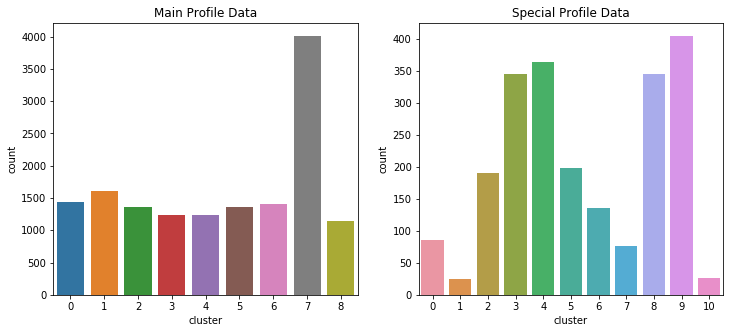

In [17]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
sns.countplot(profile_cluster_main['cluster'], ax=ax1)
ax1.set_title('Main Profile Data')

sns.countplot(profile_cluster_sp['cluster'], ax=ax2)
ax2.set_title('Special Profile Data')

### 8.3 Cluster Analysis on Main Data

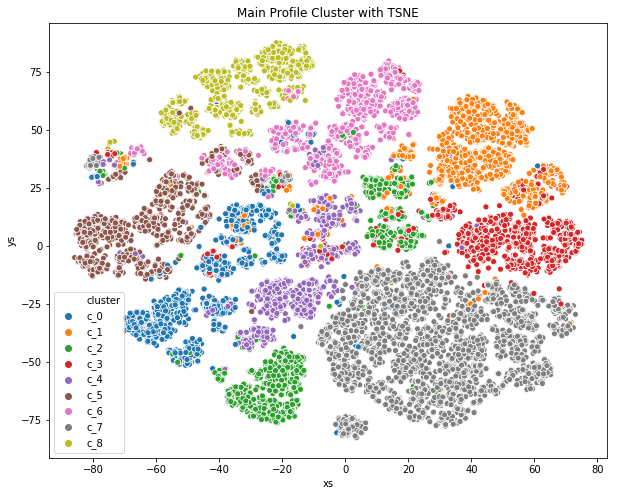

In [67]:
""" Visualise Cluster with TSNE"""
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42).fit_transform(pca_transform_main)
tsne_df = pd.DataFrame(tsne, columns=['xs', 'ys'])
tsne_df['cluster'] = ['c_' + str(i) for i in preds_main]

#plot tsne
f,ax = plt.subplots(figsize=(10,8))
sns.scatterplot('xs','ys', hue='cluster', data=tsne_df, ax=ax, hue_order=['c_' + str(i) for i in range(0,9)])
ax.set_title("Main Profile Cluster with TSNE")
#save fig
f.savefig('main_tsne.png', dpi = 300)

The figure above showed the PCA plot of first and second axes. The higher number of 1st pca is related to high number of offer completed and high rate offer completed, while the lower number is related to informational offer type (high viewed rate) and latest member in 2018. The higher number of 2nd pca is related to BOGO offer type, high number of bogo viewed, and completed, while the lower number is related to DISCOUNT offer type (high number of discount offer viewed and completed).

Cluster 7 clearly showed it is a latest customer who became member on 2018 with low offer completed rate. Cluster 0,2,4,and 5 are customers who tend to preferred BOGO offering while Cluster 1,3, and 6 are customers who preferred DISCOUNT. Cluster 8 probably like both, BOGO and DISCOUNT.



In [25]:
""" Cluster Centroid """

def inverse_transform_centroid(df, kmeans, pca, scaler):
    """ 
    INPUT : 
        df : dataframe
        kmeans : sklearn object of fitted KMeeans
        pca : sklearn object of fitted PCA
        scaler : sklearn object of fitted Scaler
    RETUNR :
        centers : dataframe of center value each cluster
    """
    centers = kmeans.cluster_centers_
    centers_pca = pca.inverse_transform(centers)
    centers = scaler.inverse_transform(centers_pca)
    centers = pd.DataFrame(centers, columns= df.columns)
    return centers

In [30]:
pd.set_option('display.max_columns', 500)

profile_main_centroid = inverse_transform_centroid(profile_main, kmeans_main, pca_main, scaler_main)
profile_main_centroid

,age,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,offer received_bogo_5_5_5,offer received_discount_10_2_7,offer viewed_bogo_10_10_7,offer viewed_bogo_10_10_5,offer viewed_informational_0_0_4,offer viewed_bogo_5_5_7,offer viewed_discount_20_5_10,offer viewed_discount_7_3_7,offer viewed_discount_10_2_10,offer viewed_informational_0_0_3,offer viewed_bogo_5_5_5,offer viewed_discount_10_2_7,offer completed_bogo_10_10_7,offer completed_bogo_10_10_5,offer completed_bogo_5_5_7,offer completed_discount_20_5_10,offer completed_discount_7_3_7,offer completed_discount_10_2_10,offer completed_bogo_5_5_5,offer completed_discount_10_2_7,avg_spending,transaction_count,sum_spending,invalid,bogo_received,bogo_viewed,rate_viewed_bogo,bogo_completed,rate_completed_viewed_bogo,rate_completed_received_bogo,discount_received,discount_viewed,rate_viewed_discount,discount_completed,rate_completed_viewed_discount,rate_completed_received_discount,informational_received,informational_viewed,rate_viewed_informational,offer_received_total,offer_viewed_total,offer_completed_total,rate_offer_viewed_overall,rate_offer_completed_received_overall,rate_offer_completed_viewed_overall,rate_offer_viewed_bogo_10_10_7,rate_offer_completed_viewed_bogo_10_10_7,rate_offer_completed_received_bogo_10_10_7,rate_offer_viewed_bogo_10_10_5,rate_offer_completed_viewed_bogo_10_10_5,rate_offer_completed_received_bogo_10_10_5,rate_offer_viewed_informational_0_0_4,rate_offer_viewed_bogo_5_5_7,rate_offer_completed_viewed_bogo_5_5_7,rate_offer_completed_received_bogo_5_5_7,rate_offer_viewed_discount_20_5_10,rate_offer_completed_viewed_discount_20_5_10,rate_offer_completed_received_discount_20_5_10,rate_offer_viewed_discount_7_3_7,rate_offer_completed_viewed_discount_7_3_7,rate_offer_completed_received_discount_7_3_7,rate_offer_viewed_discount_10_2_10,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio,member_days_since,gender_F,gender_M,gender_O,member_year_2013,member_year_2014,member_year_2015,member_year_2016,member_year_2017,member_year_2018
0,55.565284,69586.417407,1.330567,0.365851,0.423763,0.278965,0.309018,0.373149,0.371491,0.401935,0.405705,0.289413,1.283242,0.352928,0.241874,0.102196,0.061090,0.359232,0.358329,0.345511,0.391938,0.112389,1.230012,0.231526,0.016765,-0.003839,0.267037,0.296441,0.283410,0.018579,19.435108,9.691975,174.350860,0.789874,2.381089,2.130304,0.917311,1.761712,0.852236,0.772499,1.343071,0.891040,0.542133,0.578218,0.428892,0.364117,0.825698,0.587385,0.412754,4.549857,3.608729,2.339931,0.798840,0.519884,0.657429,1.003556,0.996857,0.962690,0.298164,0.194490,0.192244,0.202919,0.089443,0.014717,0.016395,0.056710,0.000043,0.003415,0.314350,0.233502,0.231909,0.311946,0.259089,0.257541,0.292237,0.330659,0.237846,0.236505,0.103524,0.023960,0.027449,4.915990,719.108423,0.516732,0.470757,0.012512,0.012546,0.020305,0.124613,0.291922,0.388555,0.162060
1,53.607053,62667.292914,0.315386,0.309158,0.436491,0.332845,0.367168,0.371219,1.353129,0.422857,0.240433,0.349240,0.252031,0.284875,0.212909,0.084232,0.060251,0.350564,1.335335,0.368780,0.215011,0.084148,0.016726,0.019516,-0.004253,-0.000186,0.262744,1.244235,0.031896,0.013826,13.783930,9.816150,118.216974,0.768371,1.197822,0.836149,0.519405,0.063885,0.102512,0.080858,2.440756,1.830297,0.789480,1.520619,0.848739,0.677221,0.859348,0.581688,0.410404,4.497926,3.248135,1.584504,0.726546,0.358644,0.499481,0.220499,0.016159,0.016984,0.244439,0.016061,0.016888,0.176813,0.076686,0.00117

In [31]:
""" Standardize Centroid Value """

profile_main_centroid_std = (profile_main_centroid - profile_main_centroid.mean()) / profile_main_centroid.std()

In [27]:
def compare_features(df, features, xlabel = 'cluster', ylabel = 'std value', figsize = (10,8)):
    """ This function is just to plot selected features"""
    n_cols = len(features)
    rows = n_cols//2 + (n_cols % 2 >0)
    
    f, axs = plt.subplots(rows,2, figsize=figsize)
    axs = axs.flatten()

    for i in range(n_cols):
        sns.barplot(df.index,features[i], data= df, ax= axs[i])
        axs[i].set_xlabel(xlabel)
        axs[i].set_ylabel(ylabel)
        axs[i].set_title('Feature : ' + features[i])
        
    plt.tight_layout()

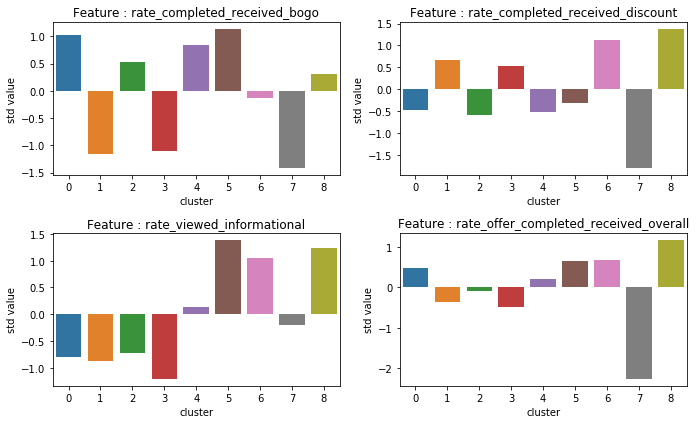

In [143]:
""" Visualize completed rate for each offer and cluster"""

features = [
    'rate_completed_received_bogo',
    'rate_completed_received_discount',
    'rate_viewed_informational',  'rate_offer_completed_received_overall']

compare_features(profile_main_centroid_std, features, figsize=(10,6))

#### Most responsive Clusters 
- **Most offer completed rate** - Cluster 0,4,5,6,8 
- Responsive to **BOGO** : Cluster 0,2,4,5,8
- Responsive to **DISCOUNT** : Cluster 1,3,6,8
- Responsive to **INFORMATIONAL** : Cluster 4,5,6,8


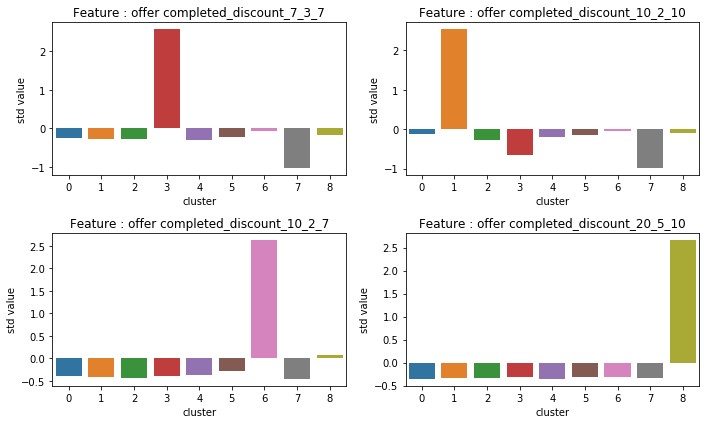

In [138]:
""" Visualize DISCOUNTS """

features = [
    'offer completed_discount_7_3_7',
    'offer completed_discount_10_2_10',
    'offer completed_discount_10_2_7',
    'offer completed_discount_20_5_10']

compare_features(profile_main_centroid_std, features, figsize=(10,6))

#### DISCOUNTS Clusters
- **Cluster 3** - very responsive to the lowest difficulty (7)
- **Cluster 1 & 6** - very reponsive to medium difficulty (10), the differences only in discount duration 
- **Cluster 8** - very responsive to the highest difficulty (20)

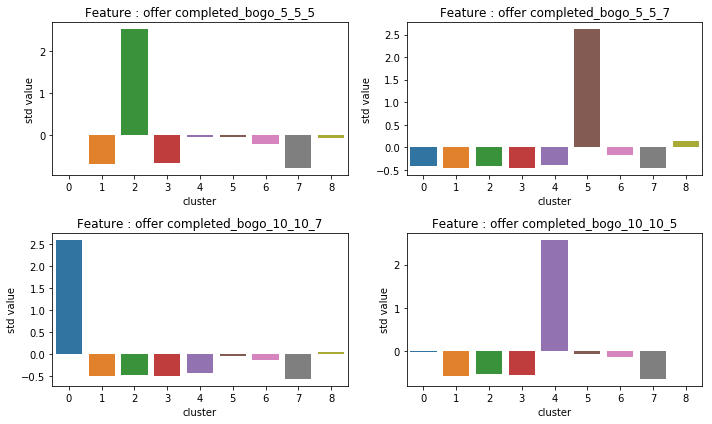

In [126]:
""" Visualize BOGO related cluster """
features= [
    'offer completed_bogo_5_5_5',
    'offer completed_bogo_5_5_7',
    'offer completed_bogo_10_10_7',
    'offer completed_bogo_10_10_5']

compare_features(profile_main_centroid_std, features, figsize=(10,6))

#### BOGO Clusters
- **Cluster 2 & 5** - very responsive to the lowest difficulty (5), only differ in bogo duration.
- **Cluster 0 & 4** - very reponsive to highest difficulty (10), only differ in bogo duration 

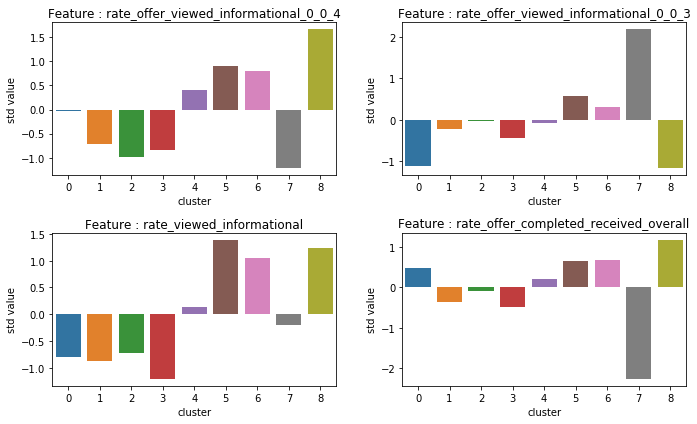

In [144]:
""" Visualize INFORMATIONAL related cluster """

features= ['rate_offer_viewed_informational_0_0_4',
     'rate_offer_viewed_informational_0_0_3',  'rate_viewed_informational','rate_offer_completed_received_overall']

compare_features(profile_main_centroid_std, features, figsize=(10,6))

#### INFORMATIONAL Clusters
- **Cluster 3** - responsive to the lowest difficulty (7)
- **Cluster 1 & 6** - reponsive to medium difficulty (10), the differences only in discount duration 
- **Cluster 8** - responsive to the highest difficulty (20)
- **Cluster 0** - not a very responsive to informational but higher offer completed rate. 

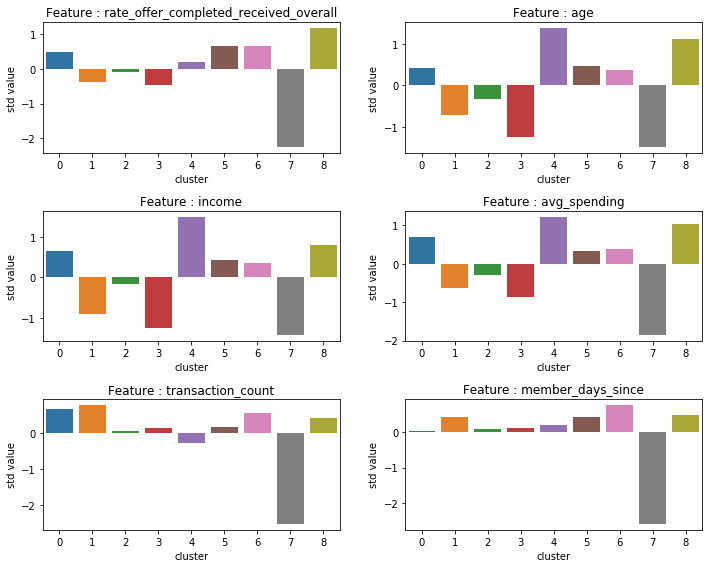

In [130]:
""" Visualize other features """

features= ['rate_offer_completed_received_overall', 'age', 'income', 'avg_spending',
           'transaction_count','member_days_since' ]

compare_features(profile_main_centroid_std, features, figsize=(10,8))

**Other feature notes** :
- `rate_offer_completed`, `Income`, `Age`, and `avg_spending` is highly correlated
- Cluster 8 - oldest age and membership, most income & average spending, relative higher transaction & offer completed rate
- Cluster 7 - just the opposite of cluster 8


In [16]:
""" create gender df """
genders = ['gender_F','gender_M', 'gender_O']
gender_df = profile_cluster_main[['gender_F','gender_M', 'gender_O', 'cluster']]#.idxmax(axis=1)#.shape
gender_df['gender'] = gender_df[genders].idxmax(axis=1)
gender_df = gender_df.drop(genders, axis=1)

""" create member_year df """
members = profile_cluster_main.columns[profile_cluster_main.columns.str.contains('member_year')].tolist()
member_df = profile_cluster_main[members + ['cluster']]#.idxmax(axis=1)#.shape
member_df['member_year'] = member_df[members].idxmax(axis=1)
member_df = member_df.drop(members, axis=1)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


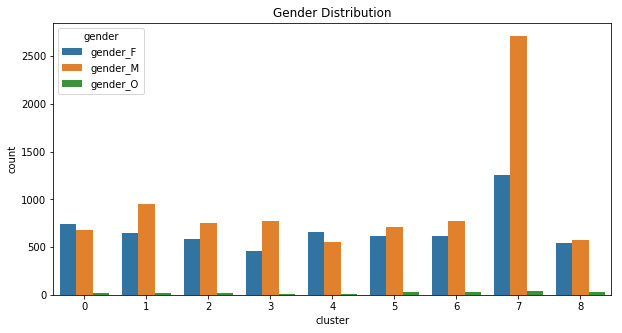

In [17]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('cluster', hue='gender', data= gender_df, ax=ax)
ax.set_title("Gender Distribution");

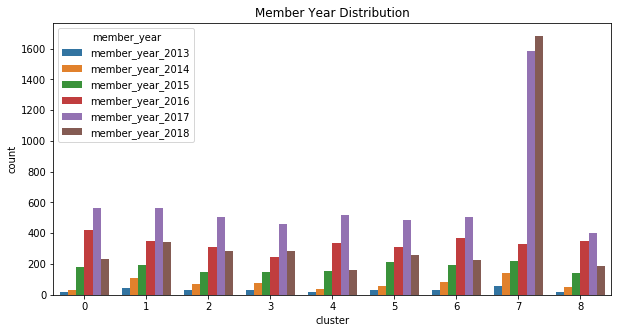

In [19]:
f, ax= plt.subplots(figsize=(10,5))
sns.countplot('cluster', hue='member_year', data= member_df, ax=ax,
             hue_order = ['member_year_' + str(i) for i in range(2013,2019,1)])
ax.set_title("Member Year Distribution");

### Cluster Analysis Summary :

- **BOGO** Cluster who response to bogo offering 
    - `Cluster 0` : above average income, average spending amount, offer completed rate
    - `Cluster 2` : slighlty below average income & spending, and lower offer completed rate
    - `Cluster 4` : the highest income and average spending amount, older group
    - `Cluster 5` : similar to `cluster 0`, but very response to informational offer
- **DISCOUNT** Cluster who response to discount offering
    - `Cluster 1` : below average income, spending and offer completed rate
    - `Cluster 3` : similar to `cluster 1` with the lowest income and spending
    - `Cluster 6` : above average income, spending and offer completed rate who very responsice to informational and discount offering
- **BOGO & DISCOUNT** Cluster who respons both bogo and discount offering
    - `Cluster 8` : very responsive to informational and discount, and also repsonsive to bogo offering, above average income, spending with most offer completed rate with the highest difficulty
- **INFORMATIONAL** Cluster who response informational offering
    - `Cluster 4, 5, 6, and 8`, and some `cluster 7`
    
- Probably not a targetted cluster:
    - `Cluster 7` : newer member who has the lowest income & offer completed rate, and probably never have a spending, may have responsive to informational offer.


**Below is the summary table.**

<img src="fig/main_cluster_summary.png"/>
Note : PLUS (+) sign indicate above average, the more (+) shows higher value up to 5 (+++++) while NEGATIVE (-) sign is the opposite.


**Summary Cluster with TSNE**
<img src="fig/main_tsne_annot.png"/>

### 8.4 Cluster Analysis on Special Profile

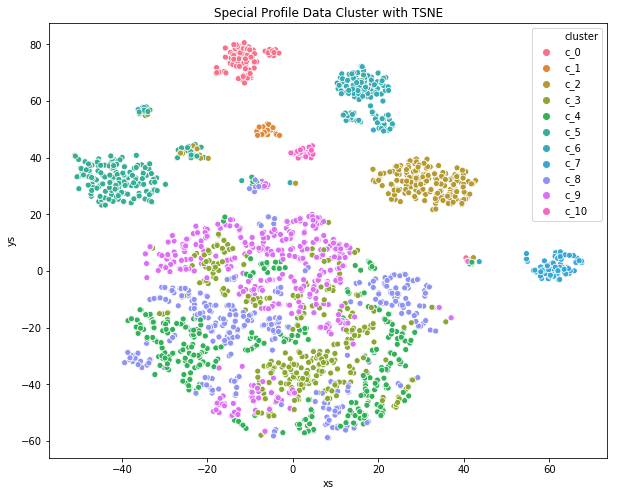

In [88]:
""" Visualise Cluster with TSNE"""
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42).fit_transform(pca_transform_sp)
tsne_df = pd.DataFrame(tsne, columns=['xs', 'ys'])
tsne_df['cluster'] = ['c_' + str(i) for i in preds_sp]


#plot tsne
f,ax = plt.subplots(figsize=(10,8))
sns.scatterplot('xs','ys', hue='cluster', data=tsne_df, ax=ax, hue_order=['c_' + str(i) for i in range(0,11)])
ax.set_title('Special Profile Data Cluster with TSNE')
f.savefig('special_tsne.png', dpi = 300)

In [66]:
""" Cluster Centroid """
pd.set_option('display.max_columns', 500)

#profile_main_clust_ = profile_main_clust.groupby('cluster').mean()[cols_]
profile_sp_centroid = inverse_transform_centroid(profile_sp, kmeans_sp, pca_sp, scaler_sp)
profile_sp_centroid

,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,offer received_bogo_5_5_5,offer received_discount_10_2_7,offer viewed_bogo_10_10_7,offer viewed_bogo_10_10_5,offer viewed_informational_0_0_4,offer viewed_bogo_5_5_7,offer viewed_discount_20_5_10,offer viewed_discount_7_3_7,offer viewed_discount_10_2_10,offer viewed_informational_0_0_3,offer viewed_bogo_5_5_5,offer viewed_discount_10_2_7,offer completed_bogo_10_10_7,offer completed_bogo_10_10_5,offer completed_bogo_5_5_7,offer completed_discount_20_5_10,offer completed_discount_7_3_7,offer completed_discount_10_2_10,offer completed_bogo_5_5_5,offer completed_discount_10_2_7,avg_spending,transaction_count,sum_spending,invalid,bogo_received,bogo_viewed,rate_viewed_bogo,bogo_completed,rate_completed_viewed_bogo,rate_completed_received_bogo,discount_received,discount_viewed,rate_viewed_discount,discount_completed,rate_completed_viewed_discount,rate_completed_received_discount,informational_received,informational_viewed,rate_viewed_informational,offer_received_total,offer_viewed_total,offer_completed_total,rate_offer_viewed_overall,rate_offer_completed_received_overall,rate_offer_completed_viewed_overall,rate_offer_viewed_bogo_10_10_7,rate_offer_completed_viewed_bogo_10_10_7,rate_offer_completed_received_bogo_10_10_7,rate_offer_viewed_bogo_10_10_5,rate_offer_completed_viewed_bogo_10_10_5,rate_offer_completed_received_bogo_10_10_5,rate_offer_viewed_informational_0_0_4,rate_offer_viewed_bogo_5_5_7,rate_offer_completed_viewed_bogo_5_5_7,rate_offer_completed_received_bogo_5_5_7,rate_offer_viewed_discount_20_5_10,rate_offer_completed_viewed_discount_20_5_10,rate_offer_completed_received_discount_20_5_10,rate_offer_viewed_discount_7_3_7,rate_offer_completed_viewed_discount_7_3_7,rate_offer_completed_received_discount_7_3_7,rate_offer_viewed_discount_10_2_10,rate_offer_completed_viewed_discount_10_2_10,rate_offer_completed_received_discount_10_2_10,rate_offer_viewed_informational_0_0_3,rate_offer_viewed_bogo_5_5_5,rate_offer_completed_viewed_bogo_5_5_5,rate_offer_completed_received_bogo_5_5_5,rate_offer_viewed_discount_10_2_7,rate_offer_completed_viewed_discount_10_2_7,rate_offer_completed_received_discount_10_2_7,transaction_completed_ratio,member_days_since,member_year_2013,member_year_2014,member_year_2015,member_year_2016,member_year_2017,member_year_2018
0,0.401034,0.345134,0.451154,1.287313,0.438600,0.413078,0.339287,0.502476,0.366025,0.232285,0.315142,0.330234,0.314845,1.222417,0.177579,0.404864,0.339469,0.423575,0.340541,0.144499,-0.001977,0.000513,1.052303,0.000038,0.108136,0.156017,0.148965,0.012861,3.870008,8.619804,31.806334,0.047242,2.399506,2.208334,0.937786,1.199804,0.641058,0.601934,1.423250,1.066412,0.574349,0.277051,0.162391,0.125967,0.953630,0.738420,0.438517,4.776385,4.013166,1.476856,0.846024,0.328071,0.415366,0.286645,-0.000542,-0.000542,0.280128,-0.000959,-0.000959,0.286446,0.981018,0.921905,0.885271,0.139687,-0.000012,-0.000203,0.344293,0.100382,0.092575,0.272514,0.107562,0.107716,0.309306,0.288682,0.122641,0.122227,0.106001,0.004877,0.004963,6.790443,674.659385,0.011874,0.011616,0.140611,0.222927,0.406106,0.206866
1,0.436799,1.320118,0.524457,0.371483,0.284860,0.318331,0.437756,0.226951,0.567766,0.395011,0.362004,1.318034,0.355619,0.238415,0.000084,0.316297,0.437216,0.166307,0.565037,0.209122,0.159141,1.134064,0.037753,0.000006,0.154939,0.278805,0.236900,0.083253,7.765491,11.052218,85.196844,0.277809,2.696166,2.483490,0.940859,1.567859,0.673087,0.626252,1.435958,0.962719,0.571796,0.517003,0.412881,0.336920,0.751408,0.521926,0.420860,4.883532,3.968134,2.084862,0.836257,0.462290,0.553885,0.237325,0.111495,0.111495,0.996600,0.892451,0.892451,0.302821,0.229919,0.034021,0.034788,-0.004086,-0.000204,-0.000508,0.322812,0.157459,0.157467,0.400926,0.275038,0.275575,0.165394,0.4257

In [32]:
""" Standardize Centroid Value """

profile_sp_centroid_std = (profile_sp_centroid - profile_sp_centroid.mean()) / profile_sp_centroid.std()

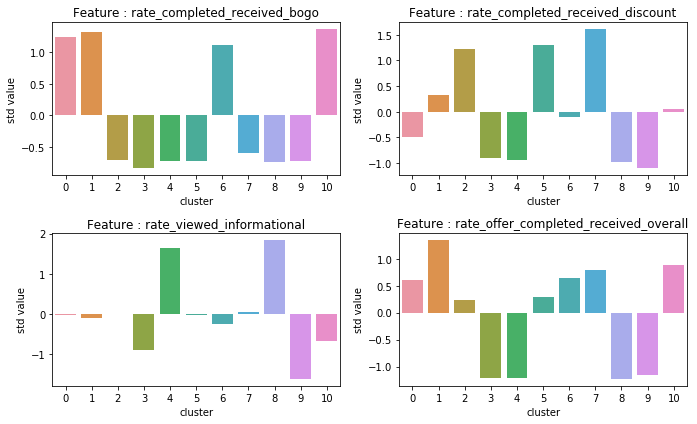

In [35]:
""" Visualize completed rate for each offer and cluster"""

features = [
    'rate_completed_received_bogo',
    'rate_completed_received_discount',
    'rate_viewed_informational',  'rate_offer_completed_received_overall']

compare_features(profile_sp_centroid_std, features, figsize=(10,6))

#### Most responsive Clusters 
- **Most offer completed rate** - `Cluster 0,1,2,5,6,7, and 10`
- Responsive to **BOGO** : `Cluster 0,1,6, and 10`
- Responsive to **DISCOUNT** : `Cluster 1,2,5,7, and 10`
- Responsive to **INFORMATIONAL** : `Cluster 4 and 8`

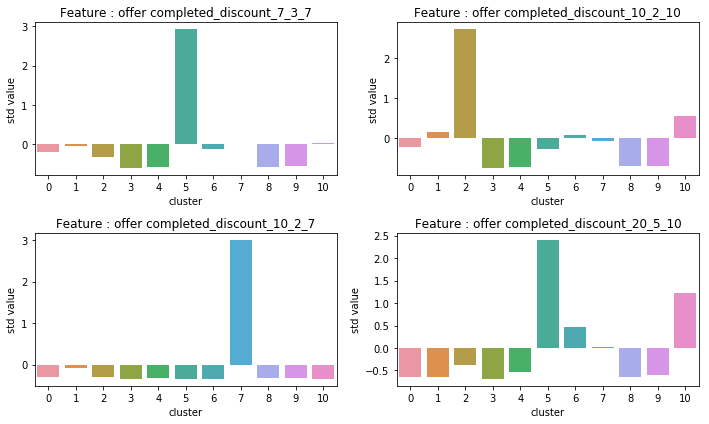

In [36]:
""" Visualize DISCOUNTS """

features = [
    'offer completed_discount_7_3_7',
    'offer completed_discount_10_2_10',
    'offer completed_discount_10_2_7',
    'offer completed_discount_20_5_10']

compare_features(profile_sp_centroid_std, features, figsize=(10,6))

#### DISCOUNTS Clusters
- **`Cluster 5`** - very responsive to the lowest difficulty (7)
- **`Cluster 2 & 7`** - very reponsive to medium difficulty (10), the differences only in discount duration 
- **`Cluster 5, 6, and 10`** - very responsive to the highest difficulty (20)

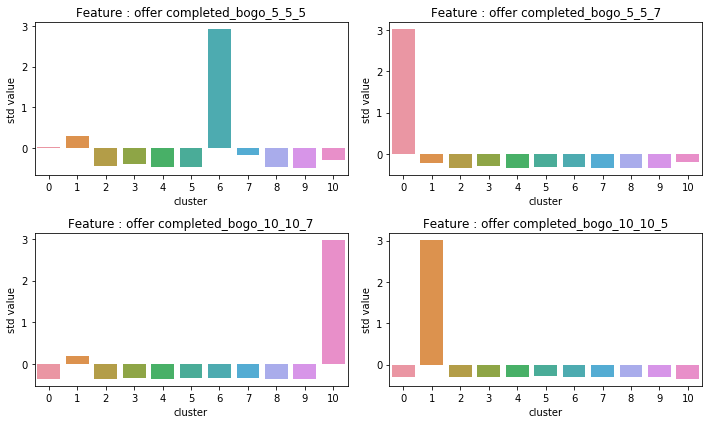

In [37]:
""" Visualize BOGO related cluster """
features= [
    'offer completed_bogo_5_5_5',
    'offer completed_bogo_5_5_7',
    'offer completed_bogo_10_10_7',
    'offer completed_bogo_10_10_5']

compare_features(profile_sp_centroid_std, features, figsize=(10,6))

#### BOGO Clusters
- **`Cluster 0, 2 & 6`** - very responsive to the lowest difficulty (5), only differ in bogo duration.
- **`Cluster 1 & 10`** - very reponsive to highest difficulty (10), only differ in bogo duration 

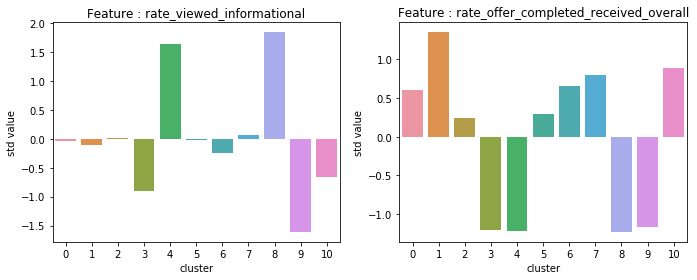

In [50]:
""" Visualize INFORMATIONAL related cluster """

features= [ 'rate_viewed_informational','rate_offer_completed_received_overall']

compare_features(profile_sp_centroid_std, features, figsize=(10,4))

#### INFORMATIONAL Clusters
- **`Cluster 4 & 9`** - very responsive to informational offer, but not on other offer as they are the lowest offer completed rate
- **`Cluster 1 & 10`** - not a very responsive to informational but highest offer completed rate. 

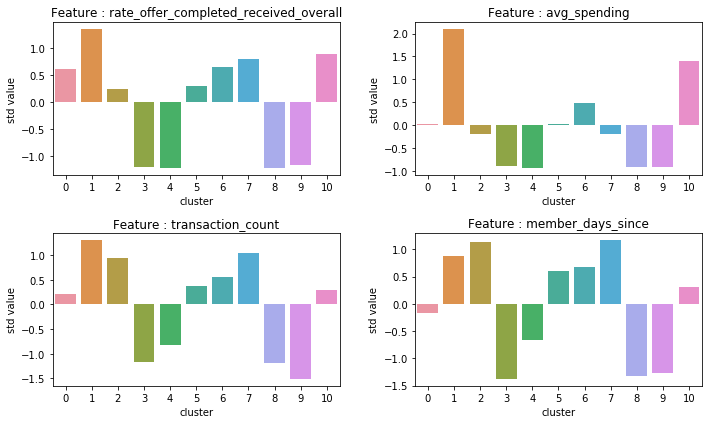

In [41]:
""" Visualize other features """

features= ['rate_offer_completed_received_overall',  'avg_spending',
           'transaction_count','member_days_since' ]

compare_features(profile_sp_centroid_std, features, figsize=(10,6))

**Other feature notes** :
- `rate_offer_completed`, `avg_spending`, `transaction_count`, `member_days_since` are highly correlated
- `Cluster 3,4,8, and 9` - newer member tend to have lower offer `completed rate / avg_spending / transaction `

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


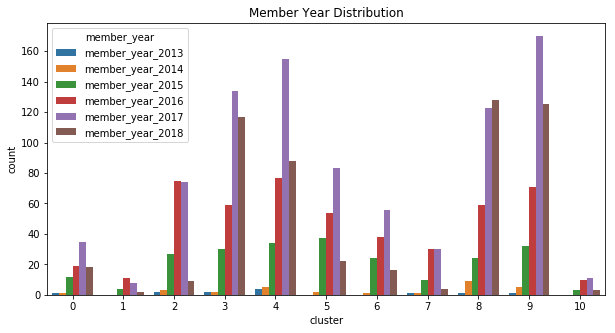

In [47]:
""" visualize member year """
members = profile_cluster_sp.columns[profile_cluster_sp.columns.str.contains('member_year')].tolist()
member_df = profile_cluster_sp[members + ['cluster']]#.idxmax(axis=1)#.shape
member_df['member_year'] = member_df[members].idxmax(axis=1)
member_df = member_df.drop(members, axis=1)

f, ax= plt.subplots(figsize=(10,5))
sns.countplot('cluster', hue='member_year', data= member_df, ax=ax,
             hue_order = ['member_year_' + str(i) for i in range(2013,2019,1)])
ax.set_title("Member Year Distribution");

#### Cluster Analysis Summary for SPECIAL PROFILE :

- **BOGO** Cluster who response to bogo offering 
    - `Cluster 0` : responsive to bogo with the lowest difficulty
    - `Cluster 1` : similar to `cluster 0` with the highest average spending and higher difficulty
    - `Cluster 6` : similar to `cluster 0` with the highest average spending.
    - `Cluster 10` : very similar to `cluster 1` 
- **DISCOUNT** Cluster who response to discount offering
    - `Cluster 1` : other than bogo, this cluster also responsive to discount.
    - `Cluster 2` : responsive to discount with the higher difficulty but less avg_spending
    - `Cluster 5` : similar to `cluster 2` with slightly higher avg_spending
    - `Cluster 7` : similar to `'cluster 2` with higher responsive 
    - `Cluster 10` : other than bogo, slightly responsive to discount
- **BOGO & DISCOUNT** Cluster who respons both bogo and discount offering
    - `Cluster 1 & 10` 
- **INFORMATIONAL** Cluster who response informational offering
    - `Cluster 0, 2 and 7` : slightly responsive to informational but very responsive to bogo or discount
    - `Cluster 4 & 8` : very responsive to informational but lowest `avg_spending & offer completed rate`
        
- Probably not a targetted cluster:
    - `Cluster 3 & 9` : not responsive to any offering and the lowest `avg_spending & offer completed rate` , mostly newer member



**Below is the summary table for SPECIAL PROFILE.**


<img src="fig/sp_cluster_summary.png"/>
Note : PLUS (+) sign indicate above average, the more (+) shows higher value up to 5 (+++++) while NEGATIVE (-) sign is the opposite.


**Summary Cluster with TSNE**
<img src="fig/special_tsne_annot.png"/>

## 9. Who and What type of offering to sent ?

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers

### 9.1 Main Profile

#### 9.1.1 Bogo & Discount

In [72]:
def assign_offer_type(profile_cluster, bogos, discounts):
    profile_target_main = profile_cluster.copy()

    for bogo in bogos:
        #bogo subset
        subset_5 = (profile_target_main.cluster == bogo) & (profile_target_main.avg_spending < 5)
        subset_10 = (profile_target_main.cluster == bogo) & (profile_target_main.avg_spending < 10)\
                    & (profile_target_main.avg_spending >= 5)
        subset_10_ = (profile_target_main.cluster == bogo) & (profile_target_main.avg_spending >= 10) & \
        (profile_target_main['rate_offer_completed_received_overall'] >= profile_target_main['rate_offer_completed_received_overall'].mean()) & \
        (profile_target_main['transaction_count'] < profile_target_main['transaction_count'].mean())

        #create new columns bogos
        profile_target_main.loc[subset_5, "bogo_5"] = 1
        profile_target_main.loc[subset_10, "bogo_10"] = 1
        profile_target_main.loc[subset_10_, "bogo_10"] = 1

    for discount in discounts:
         #discpunt subset
        subset_7 = (profile_target_main.cluster == discount) & (profile_target_main.avg_spending < 7)
        subset_10 = (profile_target_main.cluster == discount) & (profile_target_main.avg_spending < 10)\
                    & (profile_target_main.avg_spending >= 7)
        subset_20 = (profile_target_main.cluster == discount) & (profile_target_main.avg_spending < 20)\
                    & (profile_target_main.avg_spending >= 10)
        subset_20_ = (profile_target_main.cluster == discount) & (profile_target_main.avg_spending >= 10) & \
            (profile_target_main['rate_offer_completed_received_overall'] >= profile_target_main['rate_offer_completed_received_overall'].mean()) & \
            (profile_target_main['transaction_count'] < profile_target_main['transaction_count'].mean())

        #create new columns discounts
        profile_target_main.loc[subset_7, "discount_7"] = 1
        profile_target_main.loc[subset_10, "discount_10"] = 1
        profile_target_main.loc[subset_20, "discount_20"] = 1
        profile_target_main.loc[subset_20_, "discount_20"] = 1

    profile_target_main = profile_target_main.fillna(0)
    
    return profile_target_main

In [73]:
bogos = [0, 2, 4, 5]
discounts = [1,3, 6, 8]
target_main = assign_offer_type(profile_cluster_main, bogos, discounts)
target_main.head()

,age,income,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,...,member_year_2015,member_year_2016,member_year_2017,member_year_2018,cluster,bogo_5,bogo_10,discount_7,discount_10,discount_20
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
0610b486422d4921ae7d2bf64640c50b,55,112000.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0,0,1,0,7,0.0,0.0,0.0,0.0,0.0
78afa995795e4d85b5d9ceeca43f5fef,75,100000.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,5,0.0,1.0,0.0,0.0,0.0
e2127556f4f64592b11af22de27a7932,68,70000.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,1,5,0.0,1.0,0.0,0.0,0.0
389bc3fa690240e798340f5a15918d5c,65,53000.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,0.0,...,0,0,0,1,5,0.0,1.0,0.0,0.0,0.0
2eeac8d8feae4a8cad5a6af0499a211d,58,51000.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0,0,1,0,1,0.0,0.0,1.0,0.0,0.0


In [74]:
def calc_assign_offer(profile_target_df):
    
    cluster_max = profile_target_df.cluster.max()
    target_cols = ['bogo_5', 'bogo_10', 'discount_7', 'discount_10','discount_20']
    target_summary = pd.DataFrame()

    for cluster in range(0,cluster_max+1):
        cluster_series = pd.Series(name=cluster)
        total_cluster = profile_target_df[profile_target_df.cluster==cluster]
        cluster_series['total_cluster'] = total_cluster.shape[0]
        for col in target_cols:
            cluster_series[col] = total_cluster[col].sum()

        target_summary = pd.concat([target_summary, cluster_series], axis=1, sort=True)

    target_summary_ = target_summary.T
    target_summary_['target'] = target_summary_[target_cols].sum(axis=1)
    target_summary_['target_frac'] = target_summary_.target / target_summary_.total_cluster
    target_summary_['not_target'] = target_summary_.total_cluster - target_summary_.target
    return target_summary_

In [75]:
target_main_summary = calc_assign_offer(target_main)
target_main_summary

,bogo_10,bogo_5,discount_10,discount_20,discount_7,total_cluster,target,target_frac,not_target
0,568.0,68.0,0.0,0.0,0.0,1443.0,636.0,0.440748,807.0
1,0.0,0.0,81.0,510.0,688.0,1611.0,1279.0,0.793917,332.0
2,374.0,386.0,0.0,0.0,0.0,1353.0,760.0,0.561715,593.0
3,0.0,0.0,63.0,358.0,578.0,1244.0,999.0,0.803055,245.0
4,479.0,56.0,0.0,0.0,0.0,1230.0,535.0,0.434959,695.0
5,560.0,178.0,0.0,0.0,0.0,1356.0,738.0,0.544248,618.0
6,0.0,0.0,92.0,830.0,220.0,1414.0,1142.0,0.807638,272.0
7,0.0,0.0,0.0,0.0,0.0,4011.0,0.0,0.000000,4011.0
8,0.0,0.0,55.0,798.0,42.0,1146.0,895.0,0.780977,251.0


In [133]:
def plot_assign_offer(summary_df):
    f, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4), sharey=True)
    summary_df[['bogo_5','bogo_10', 'discount_7', 'discount_10', 'discount_20']].plot(kind='bar', stacked=True, ax=ax1)
    summary_df[['target', 'not_target']].plot(kind='bar', stacked=True, ax=ax2)

    ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0);
    ax2.set_xticklabels(ax2.get_xticklabels(),rotation=0);
    ax1.set_title('Bogo & Discount Target Profile')
    ax2.set_title('Target Profile for Bogo & Discount')
    ax1.set_xlabel('Cluster')
    ax2.set_xlabel('Cluster')
    ax1.set_ylabel('Total Count')
    plt.tight_layout()

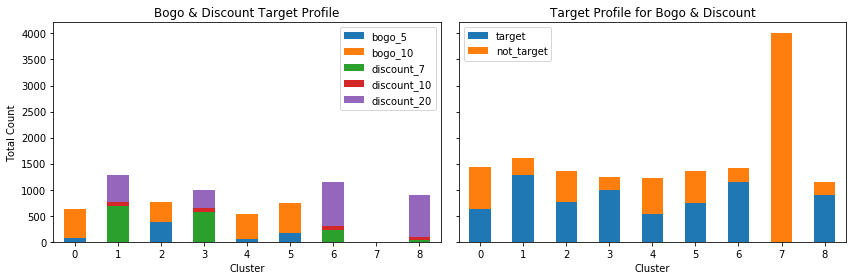

In [134]:
plot_assign_offer(target_main_summary)

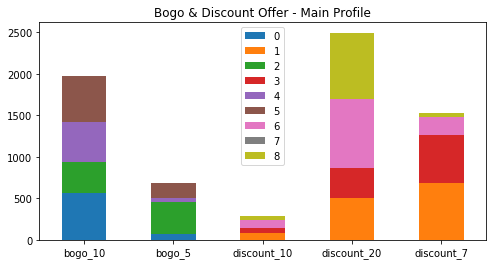

In [132]:
f, ax = plt.subplots(figsize=(8,4))
target_main_summary.loc[:, target_sp_summary.columns.str.contains("bogo|discount")].T.plot(kind='bar',stacked=True,ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Bogo & Discount Offer - Main Profile');


#### 9.1.2 Informational Offer

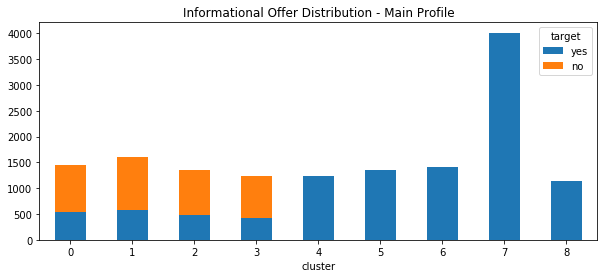

In [135]:
clust_info_main = profile_cluster_main.copy()
clust_info_main.loc[clust_info_main.cluster.isin([4,5,6,7,8]), 'target'] = "yes"
clust_info_main.loc[clust_info_main['rate_viewed_informational'] >= 0.8, 'target'] = 'yes'
clust_info_main['target'] = clust_info_main['target'].fillna("no")

f, ax = plt.subplots(figsize=(10,4))
clust_info_main.groupby(['cluster', 'target']).size().unstack()[['yes','no']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Informational Offer Distribution - Main Profile');

#### 9.1.2. Put it all together

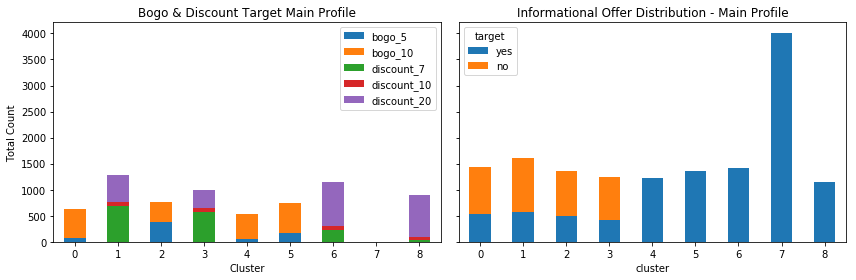

In [131]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4), sharey=True)

target_main_summary[['bogo_5','bogo_10', 'discount_7', 'discount_10', 'discount_20']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0);
ax1.set_title('Bogo & Discount Target Main Profile')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Total Count')

clust_info_main.groupby(['cluster', 'target']).size().unstack()[['yes','no']].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0);
ax2.set_title('Informational Offer Distribution - Main Profile');

plt.tight_layout()


### 9.2 Special Profile

#### 9.2.1 Bogo and Discount

In [78]:
bogos = [0, 6,10]
discounts = [1,2,5,7]
target_sp = assign_offer_type(profile_cluster_sp, bogos, discounts)
target_sp.head()

,offer received_bogo_10_10_7,offer received_bogo_10_10_5,offer received_informational_0_0_4,offer received_bogo_5_5_7,offer received_discount_20_5_10,offer received_discount_7_3_7,offer received_discount_10_2_10,offer received_informational_0_0_3,offer received_bogo_5_5_5,offer received_discount_10_2_7,...,member_year_2015,member_year_2016,member_year_2017,member_year_2018,cluster,bogo_5,bogo_10,discount_7,discount_10,discount_20
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
68be06ca386d4c31939f3a4f0e3dd783,0.0,0.0,0.0,0.0,1.0,1.0,2.0,0.0,0.0,1.0,...,0,0,1,0,5,0.0,0.0,1.0,0.0,0.0
38fe809add3b4fcf9315a9694bb96ff5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,1,4,0.0,0.0,0.0,0.0,0.0
a03223e636434f42ac4c3df47e8bac43,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,0,8,0.0,0.0,0.0,0.0,0.0
8ec6ce2a7e7949b1bf142def7d0e0586,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,...,0,0,1,0,8,0.0,0.0,0.0,0.0,0.0
68617ca6246f4fbc85e91a2a49552598,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0,0,1,0,9,0.0,0.0,0.0,0.0,0.0


In [79]:
target_sp_summary = calc_assign_offer(target_sp)
target_sp_summary

,bogo_10,bogo_5,discount_10,discount_20,discount_7,total_cluster,target,target_frac,not_target
0,7.0,75.0,0.0,0.0,0.0,86.0,82.0,0.953488,4.0
1,0.0,0.0,3.0,5.0,16.0,25.0,24.0,0.960000,1.0
2,0.0,0.0,2.0,8.0,180.0,190.0,190.0,1.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,344.0,0.0,0.000000,344.0
4,0.0,0.0,0.0,0.0,0.0,363.0,0.0,0.000000,363.0
5,0.0,0.0,2.0,10.0,185.0,198.0,197.0,0.994949,1.0
6,14.0,114.0,0.0,0.0,0.0,135.0,128.0,0.948148,7.0
7,0.0,0.0,3.0,3.0,70.0,76.0,76.0,1.000000,0.0
8,0.0,0.0,0.0,0.0,0.0,344.0,0.0,0.000000,344.0
9,0.0,0.0,0.0,0.0,0.0,404.0,0.0,0.000000,404.0


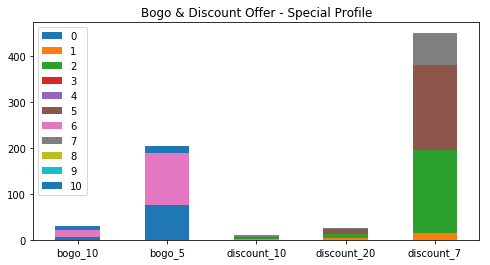

In [141]:
f, ax = plt.subplots(figsize=(8,4))
target_sp_summary.loc[:, target_sp_summary.columns.str.contains("bogo|discount")].T.plot(kind='bar',stacked=True,ax=ax)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Bogo & Discount Offer - Special Profile');


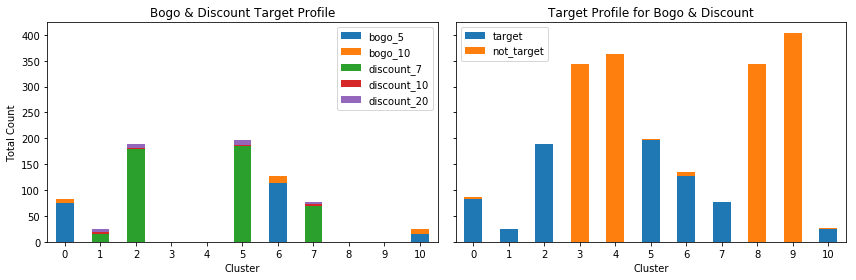

In [137]:
plot_assign_offer(target_sp_summary)

#### 9.2.2 Informational Offer

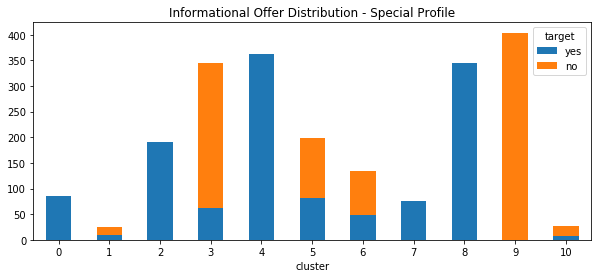

In [138]:
clust_info_sp = target_sp.copy()
clust_info_sp.loc[clust_info_sp.cluster.isin([0,2,4,7,8]), 'target'] = "yes"
clust_info_sp.loc[clust_info_sp['rate_viewed_informational'] >= 0.8, 'target'] = 'yes'
clust_info_sp['target'] = clust_info_sp['target'].fillna("no")

f, ax = plt.subplots(figsize=(10,4))
clust_info_sp.groupby(['cluster', 'target']).size().unstack()[['yes','no']].plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Informational Offer Distribution - Special Profile');

#### 9.2.3 Put it all together

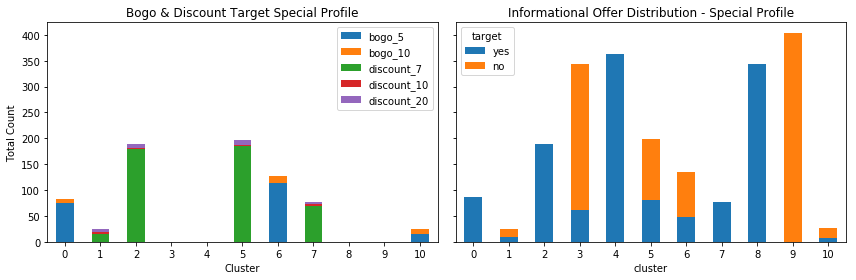

In [130]:
f, (ax1,ax2) = plt.subplots(1,2, figsize=(12,4), sharey=True)

target_sp_summary[['bogo_5','bogo_10', 'discount_7', 'discount_10', 'discount_20']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=0);
ax1.set_title('Bogo & Discount Target Special Profile')
ax1.set_xlabel('Cluster')
ax1.set_ylabel('Total Count')

clust_info_sp.groupby(['cluster', 'target']).size().unstack()[['yes','no']].plot(kind='bar', stacked=True, ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0);
ax2.set_title('Informational Offer Distribution - Special Profile');

plt.tight_layout()

### 9.3 Summary Offer Type Distribution 

In [107]:
#main profile
main_series = target_main_summary.loc[:, target_main_summary.columns.str.contains("bogo|discount")].sum().rename('Main Profile')
main_series['informational'] = clust_info_main.groupby(['cluster', 'target']).size().unstack().sum()['yes']

#special profile 
sp_series = target_sp_summary.loc[:, target_sp_summary.columns.str.contains("bogo|discount")].sum().rename('Special Profile')
sp_series['informational'] = clust_info_sp.groupby(['cluster', 'target']).size().unstack().sum()['yes']

In [108]:
main_series

bogo_10           1981.0
bogo_5             688.0
discount_10        291.0
discount_20       2496.0
discount_7        1528.0
informational    11180.0
Name: Main Profile, dtype: float64

In [109]:
sp_series

bogo_10            31.0
bogo_5            204.0
discount_10        10.0
discount_20        26.0
discount_7        451.0
informational    1267.0
Name: Special Profile, dtype: float64

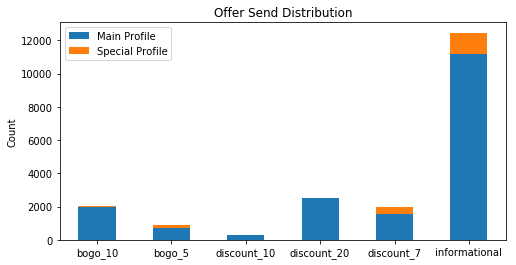

In [140]:
summary_df = pd.concat([main_series,sp_series], axis=1)

#bar plot
f, ax = plt.subplots(figsize=(8,4))
summary_df.plot(kind='bar', stacked=True, ax=ax)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0);
ax.set_title('Offer Send Distribution');
ax.set_ylabel('Count');

## 10. Conclusion

### Summary Cluster Demographics

**Below is the summary table.**

<img src="fig/main_cluster_summary.png"/>
Note : PLUS (+) sign indicate above average, the more (+) shows higher value up to 5 (+++++) while NEGATIVE (-) sign is the opposite.


**Below is the summary table for SPECIAL PROFILE.**


<img src="fig/sp_cluster_summary.png"/>
Note : PLUS (+) sign indicate above average, the more (+) shows higher value up to 5 (+++++) while NEGATIVE (-) sign is the opposite.


### Reflection 
An unsupervised machine learning can really help us to identify and understand customers more so we can send the offer effectively. Based on the above strategy, mostly we will send informational offer and few other offers. The strategy is flexible enough. The most important that we gain more understanding about the customer demographics & clusters. We can define another strategy that fit for purpose based their demographics and clusters.

Another lesson learned that profiles with missing value in income and gender are also a profitable customer. We tend to remove those data during analysis. However rather than drop them, it is better to investigate further. We can maximize the available data and transform them into a useful features so we can also identify and understand their demographics.

### Improvement

To be better in offer targetted, we should know about the pattern that made the customers become regulars and responsive to each offer types from the beginning they became member. By knowing it, we can make an offer type recomendation engine to improve engagement especially for newer members (cold start) and maintain their engagement. One way we could do this by implementing matrix factorization like we did for IBM recommendation project.

```
What the recommended offer do we send to a new customer so that they would become regulars?
```
